# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [195]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import the metrics class from sklearn
from sklearn import metrics
# Import the variance_inflation_factor class from statsmodels.stats.outliers_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import the train_test_split class from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Import the DecisionTreeClassifier class from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Import the tree module from sklearn
from sklearn import tree
# Import the GridSearchCV class from sklearn.model_selection
from sklearn.model_selection import GridSearchCV
# Import the f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, and make_scorer functions from sklearn.metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

## Loading the dataset

In [196]:
# Load the dataset
df = pd.read_csv('Loan_Modelling.csv')

## Data Overview

* Observations
* Sanity checks

In [197]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [198]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [199]:
print(f"Number of rows: {df.shape[0] }, Number of columns {df.shape[1]}")

Number of rows: 5000, Number of columns 14


In [200]:
# Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Observations

- There are 5000 rows and 14 columns in the DataFrame.
- The data types of the columns are:
  - ID: int64
  - Age: int64
  - Experience: int64
  - Income: int64
  - ZIPCode: int64
  - Family: int64
  - CCAvg: float64
  - Education: int64
  - Mortgage: int64
  - Personal_Loan: int64
  - Securities_Account: int64
  - CD_Account: int64
  - Online: int64
  - CreditCard: int64

In [201]:
# Count the duplicated  data
df[df.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Observations

- There are no duplicated values in the dataset

In [202]:
# Count null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Observations

- There are no missing values in the data.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [203]:
# The describe() method returns a DataFrame that contains descriptive statistics for each column of the DataFrame.
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Observations

- ID: Not apply.
- Age: The average age is 45.34 years, with a standard deviation of 11.46. The minimum age is 23, and the maximum age is 67.
- Experience: The average work experience is 20.10 years, with a standard deviation of 11.47. The minimum experience is -3 (which might indicate an error or missing data), and the maximum experience is 43.
- Income: The average income is 73.77, with a standard deviation of 46.03. The minimum income is 8, and the maximum income is 224.
- ZIPCode: Not apply.
- Family: The average family size is 2.40, with a standard deviation of 1.15. The minimum family size is 1, and the maximum family size is 4.
- CCAvg: The average credit card spending per month is 1.94, with a standard deviation of 1.75. The minimum spending is 0, and the maximum spending is 10.
- Education: The average education level is 1.88, with a standard deviation of 0.84. The education level ranges from 1 to 3.
- Mortgage: The average mortgage amount is 56.50, with a standard deviation of 101.71. The minimum mortgage is 0, and the maximum mortgage is 635.
- Personal_Loan: The percentage of individuals with personal loans is 9.6%. The variable is binary, with 0 indicating no personal loan and 1 indicating a personal loan.
- Securities_Account: The percentage of individuals with a securities account is 10.4%. The variable is binary, with 0 indicating no securities account and 1 indicating a securities account.
- CD_Account: The percentage of individuals with a certificate of deposit (CD) account is 6.04%. The variable is binary, with 0 indicating no CD account and 1 indicating a CD account.
- Online: The percentage of individuals using online banking is 59.68%. The variable is binary, with 0 indicating no online banking and 1 indicating online banking.
- CreditCard: The percentage of individuals with a credit card is 29.4%. The variable is binary, with 0 indicating no credit card and 1 indicating a credit card.

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

<Axes: xlabel='Mortgage'>

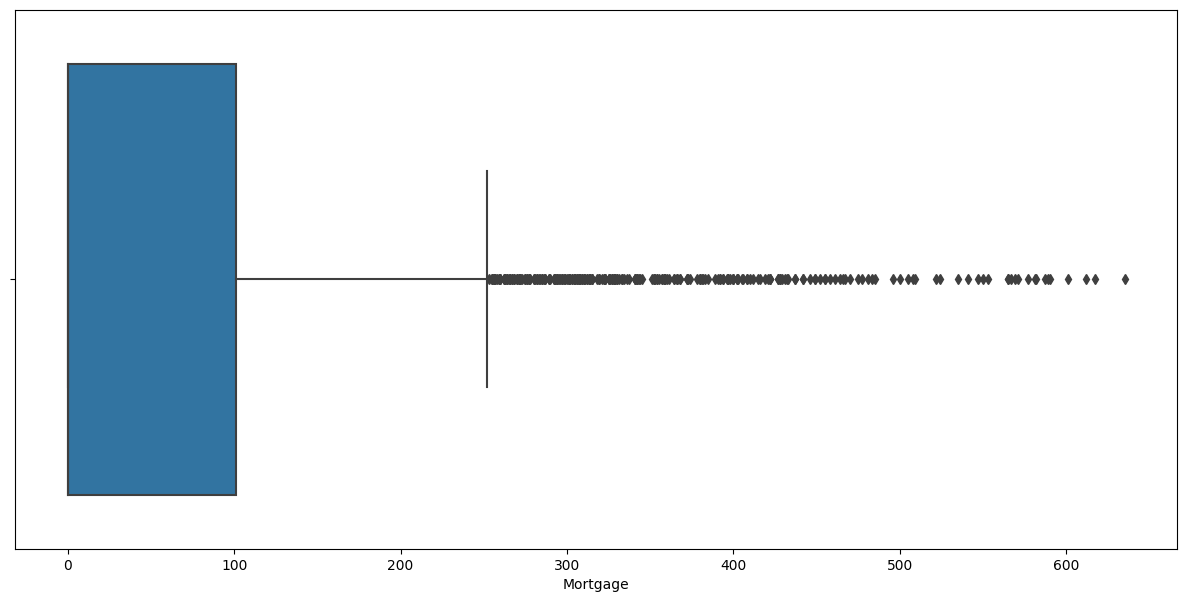

In [204]:
# Generating a box plot
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='Mortgage')

Observation 

Mortgage has a right skewed distribution with a high percentage of outliers

2. How many customers have credit cards?

In [205]:
use_a_credit_card = df[df['CCAvg'] != 0]
has_a_credit_card = df[df['CreditCard'] == 1]
combined_list = set(use_a_credit_card.index).union(has_a_credit_card.index)

print("Customer whit credit card:", len(combined_list))

Customer whit credit card: 4922


3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

<Axes: >

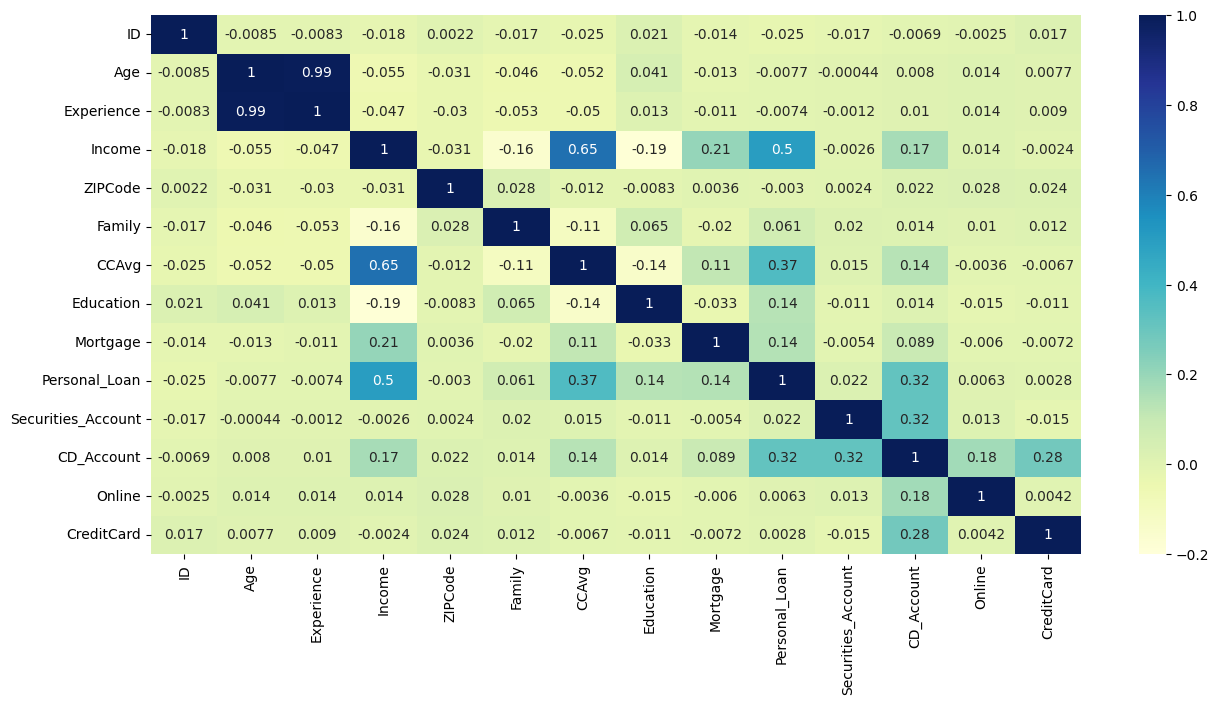

In [206]:
# Plot a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(data=df.corr(), annot=True, cmap='YlGnBu', vmin=-0.2, vmax=1)

### Observations

In this case, the correlation matrix shows that the following variables are most closely related:

- Personal_loan and Income (correlation coefficient of 0.5)
- Personal_loan and CCAvg (correlation coefficient of 0.037)
- Personal_loan and CD_Account (correlation coefficient of 0.032)

In [207]:

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

4. How does a customer's interest in purchasing a loan vary with their age?


<Figure size 1500x700 with 0 Axes>

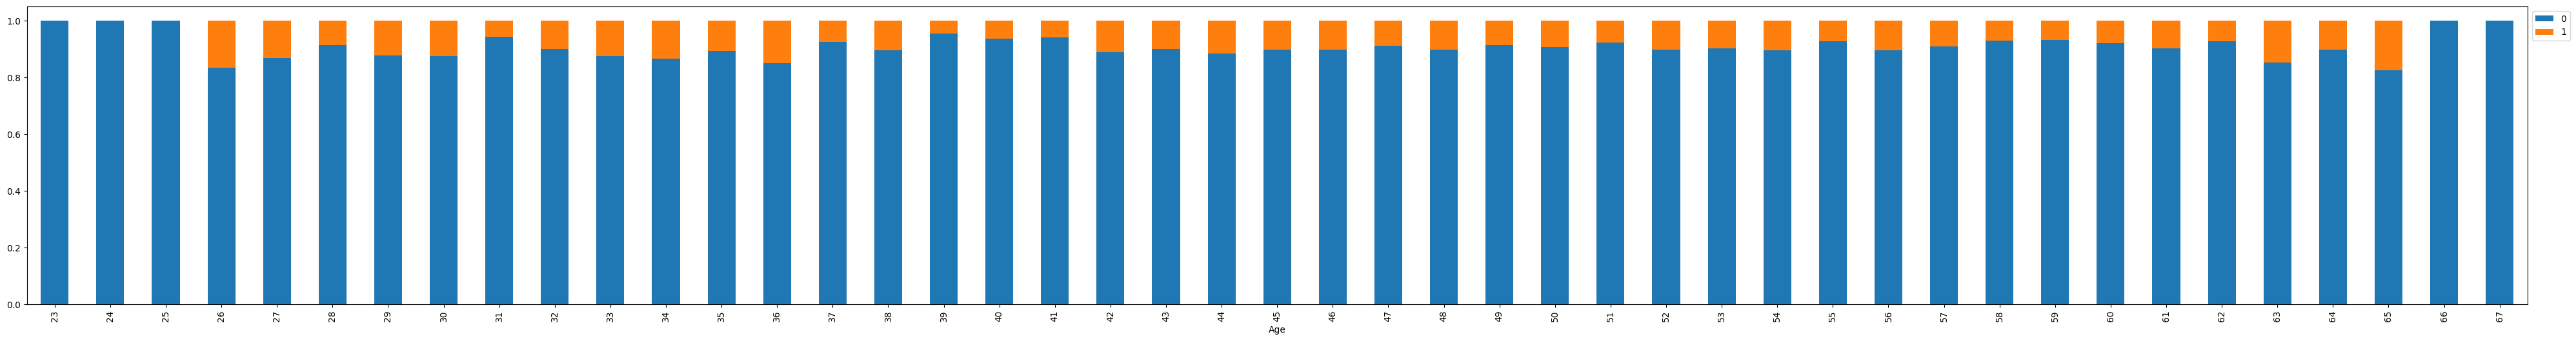

In [208]:
plt.figure(figsize=(15, 7))
stacked_barplot(df, 'Age', 'Personal_Loan')

### Observation


There is a relationship between productivity, age, and loans. As people age, they tend to become more productive, which can lead to higher earnings. This, in turn, can make them more likely to be able to afford to take out a loan.

5. How does a customer's interest in purchasing a loan vary with their education?

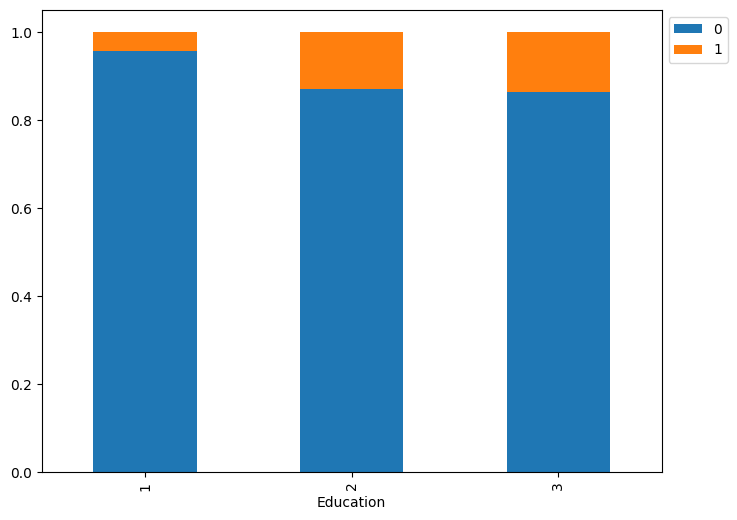

In [209]:
stacked_barplot(df, 'Education', 'Personal_Loan')

### Observations

- Customers with more education are more likely to be interested in taking out a loan
- Customers with less education may have fewer financial resources than customers with more education, so they may be more likely to not take out a loan





## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [210]:
# Unique values of all the columns to check values

for column in df.columns:
    print('-'*20)
    print(column)
    print(df[column].unique())

--------------------
ID
[   1    2    3 ... 4998 4999 5000]
--------------------
Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
--------------------
Experience
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
--------------------
Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 2

Column ID is not relevant, same information as index

In [211]:
df = df.drop('ID', axis=1)

We can observe some wrong values in the Experience column

In [212]:
df[df['Experience'] < 0]['Experience'].unique()

array([-1, -2, -3])

In [213]:
# Correcting the wrong values
df['Experience'].replace(-1, 1, inplace=True)
df['Experience'].replace(-2, 2, inplace=True)
df['Experience'].replace(-3, 3, inplace=True)

Data distribution

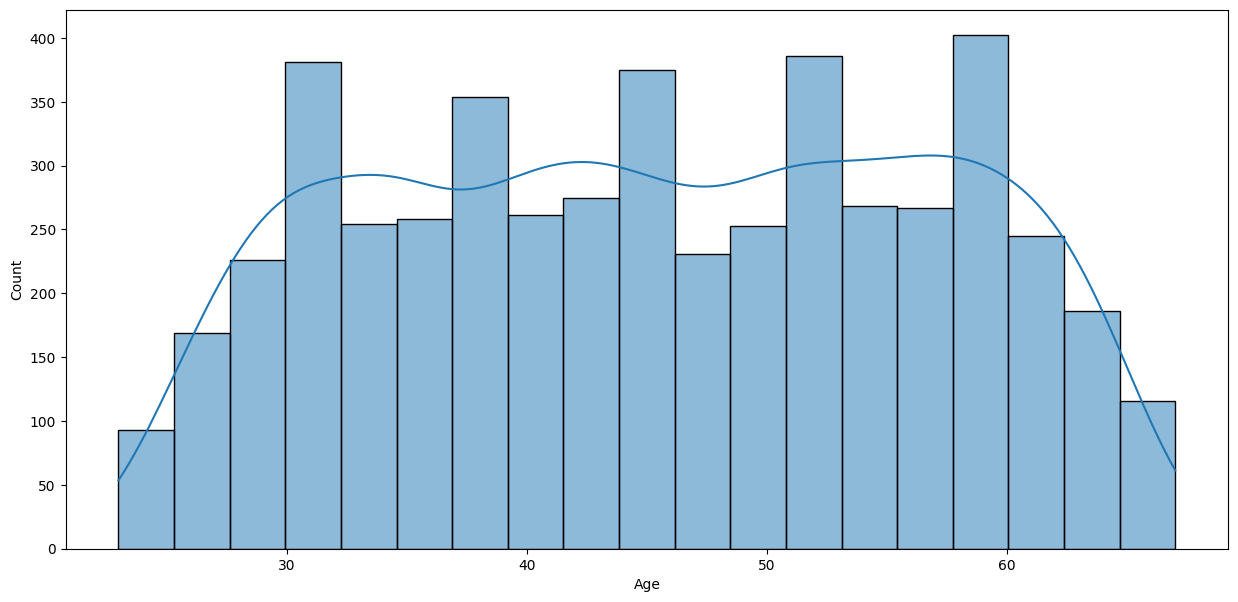

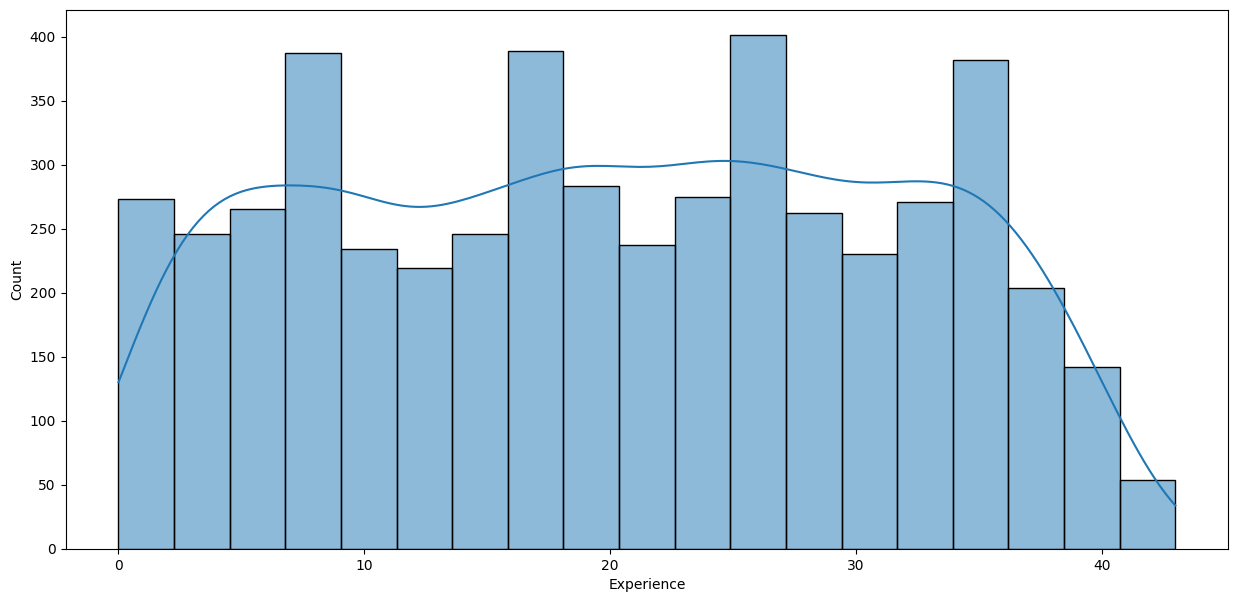

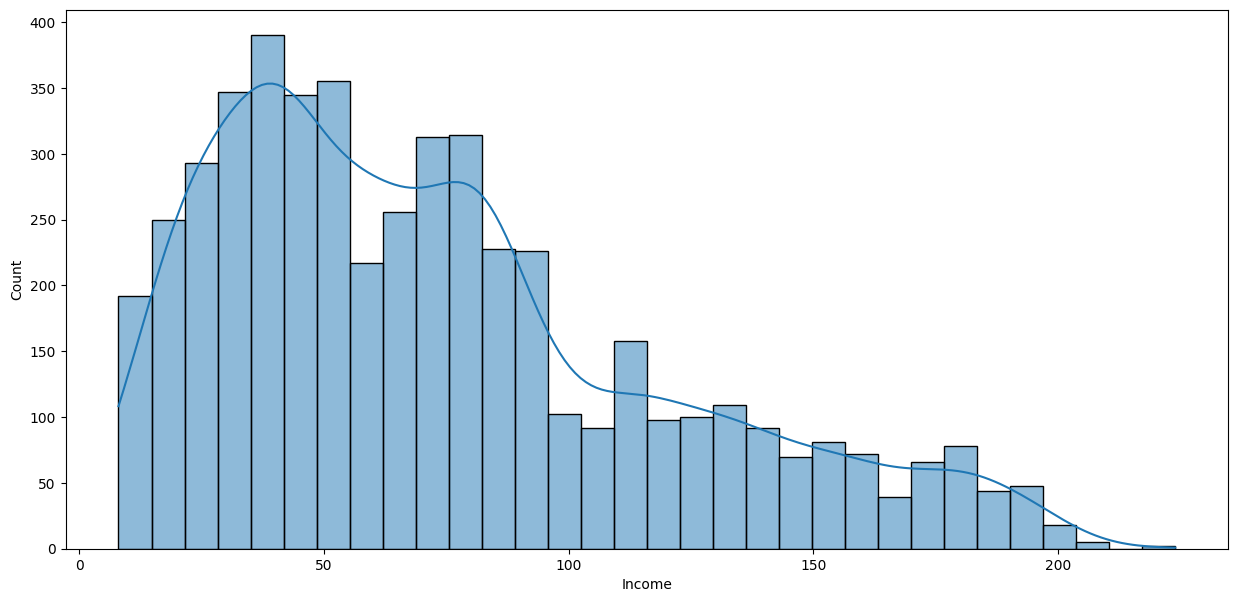

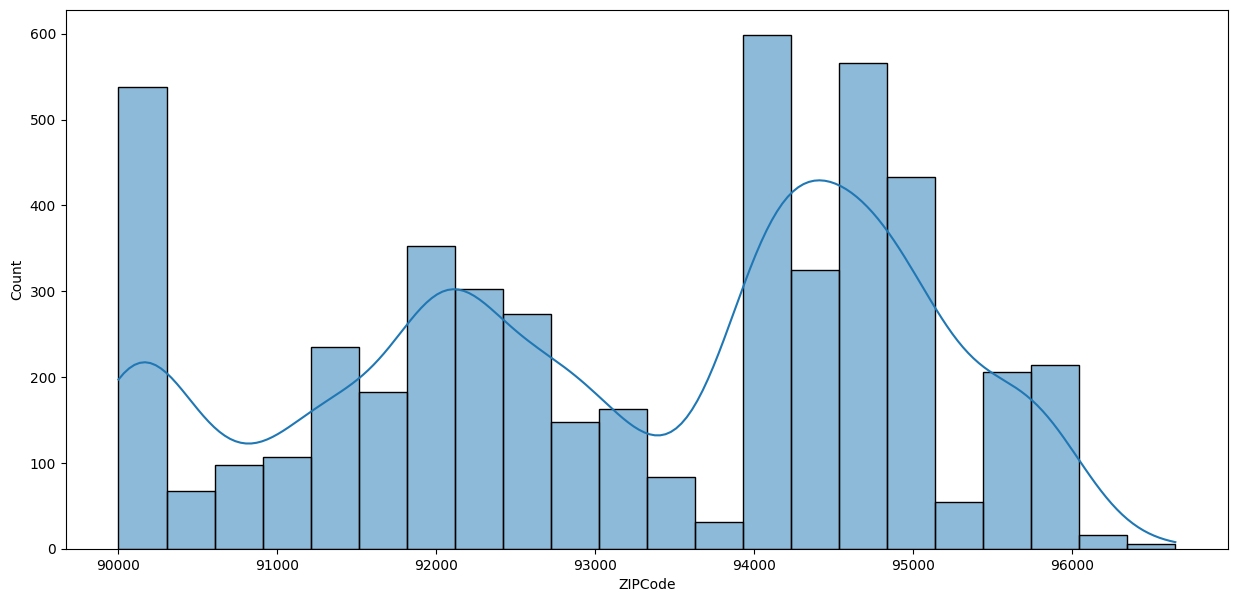

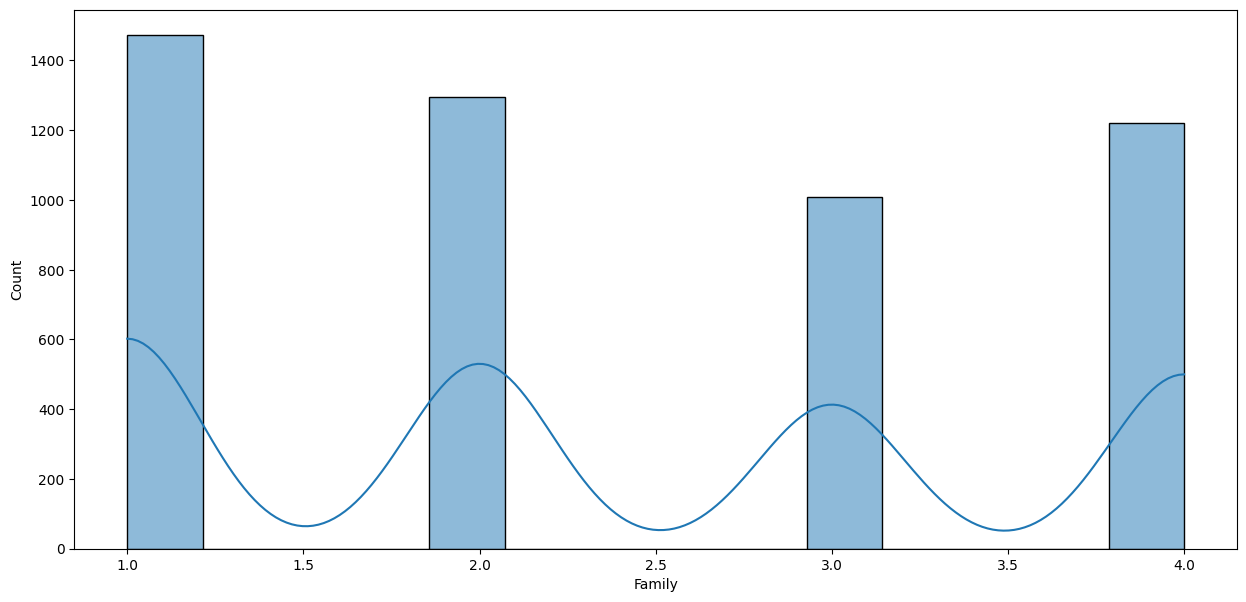

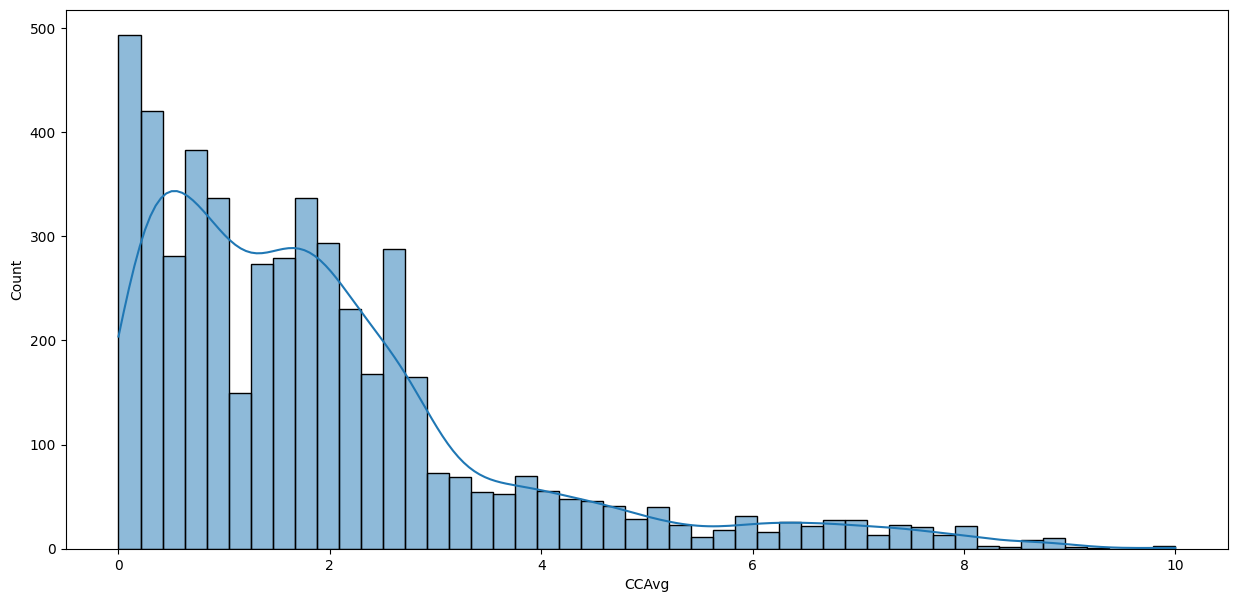

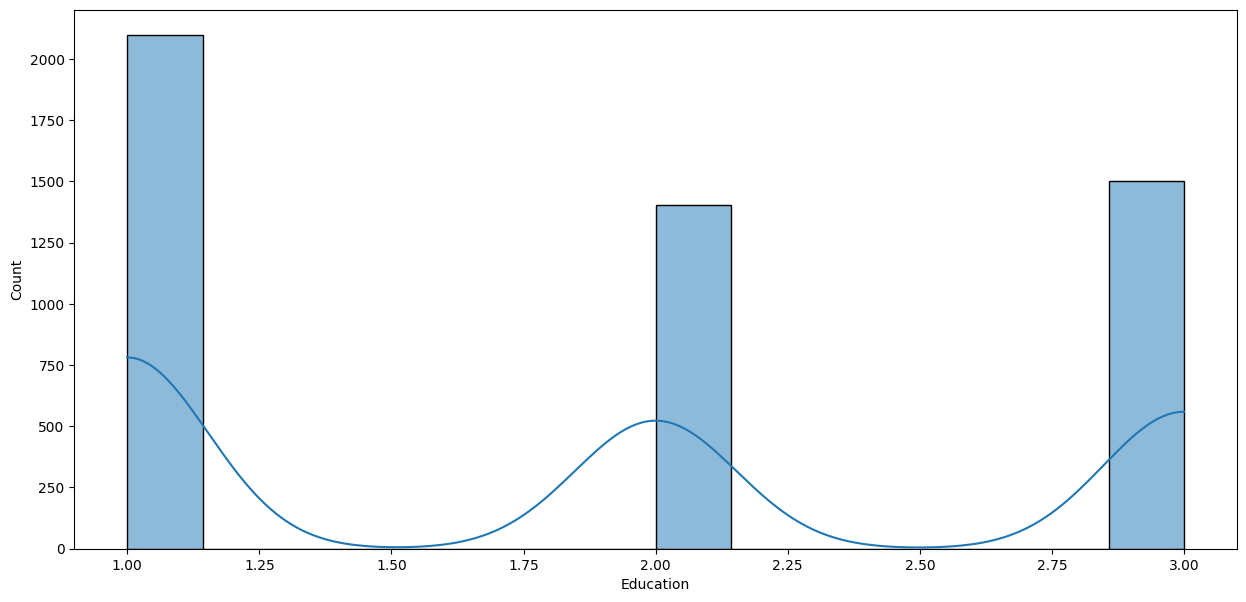

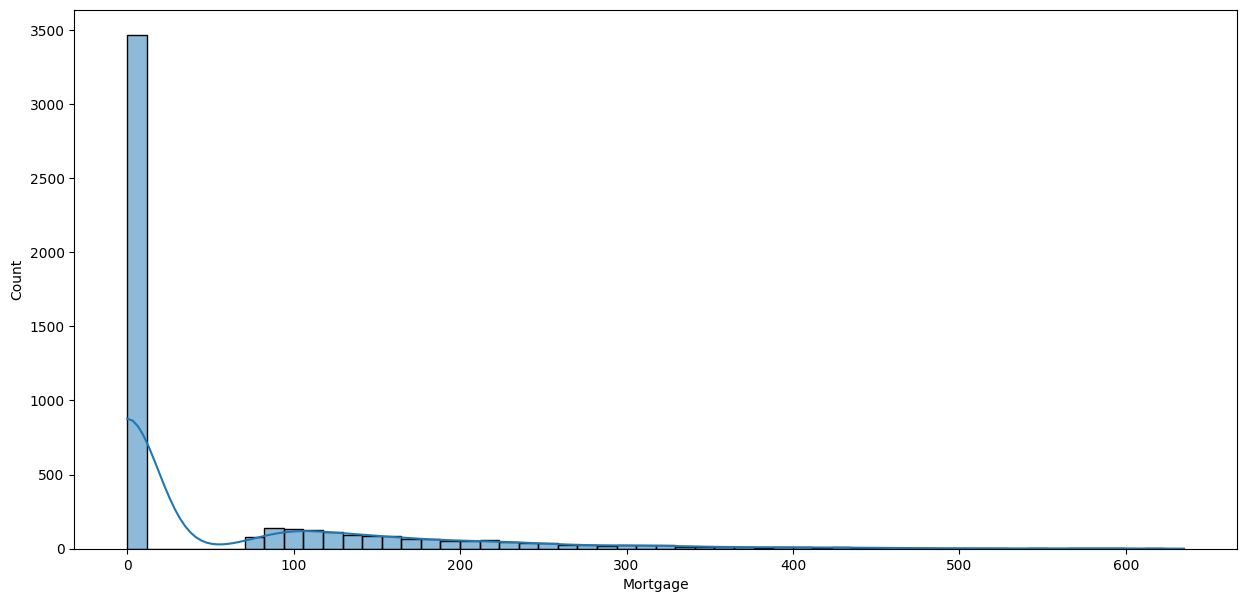

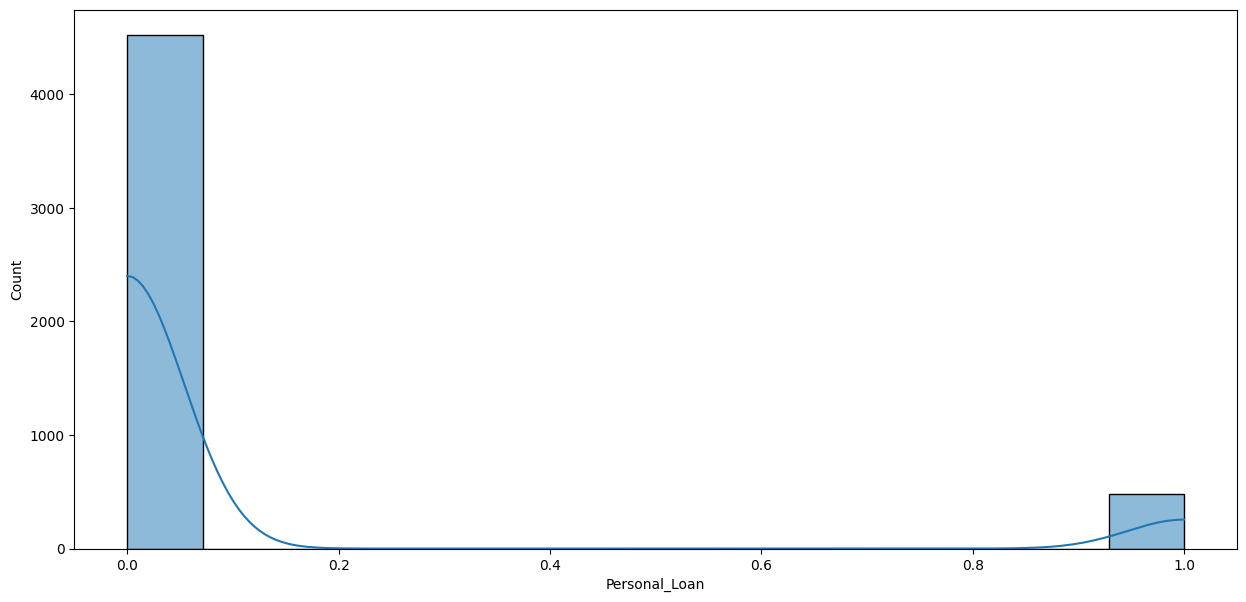

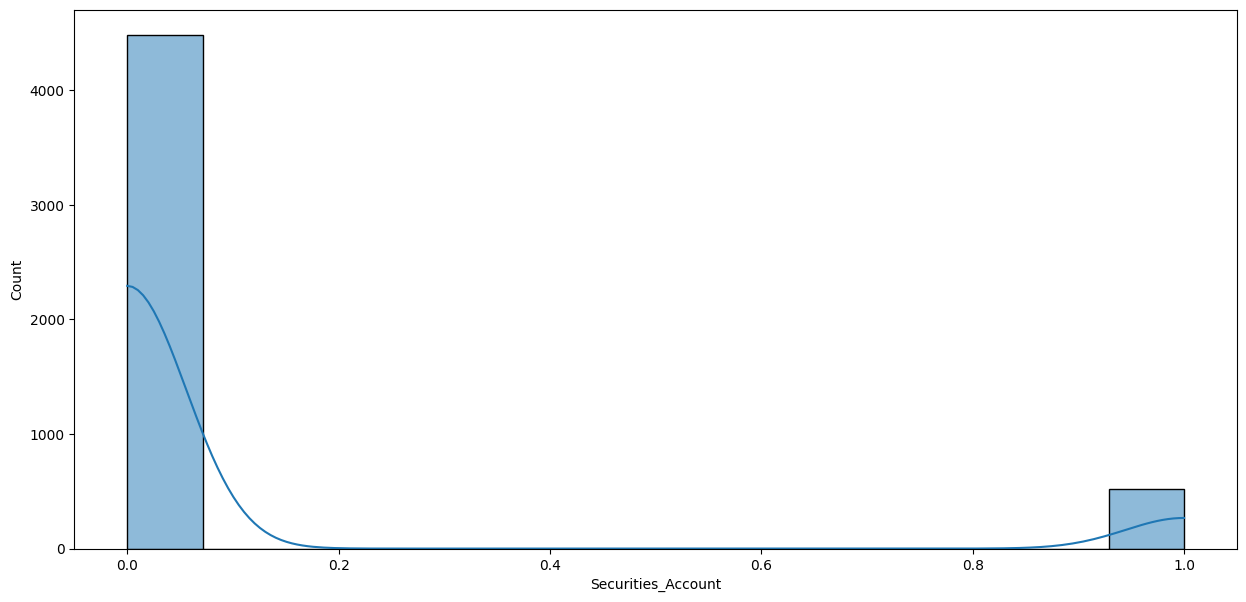

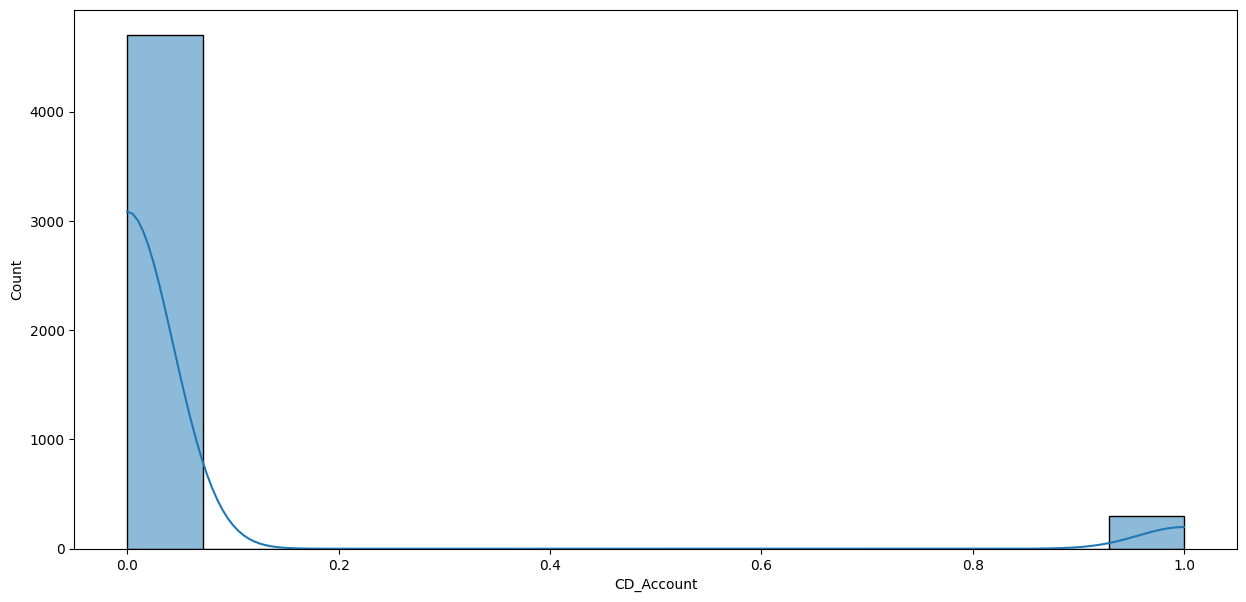

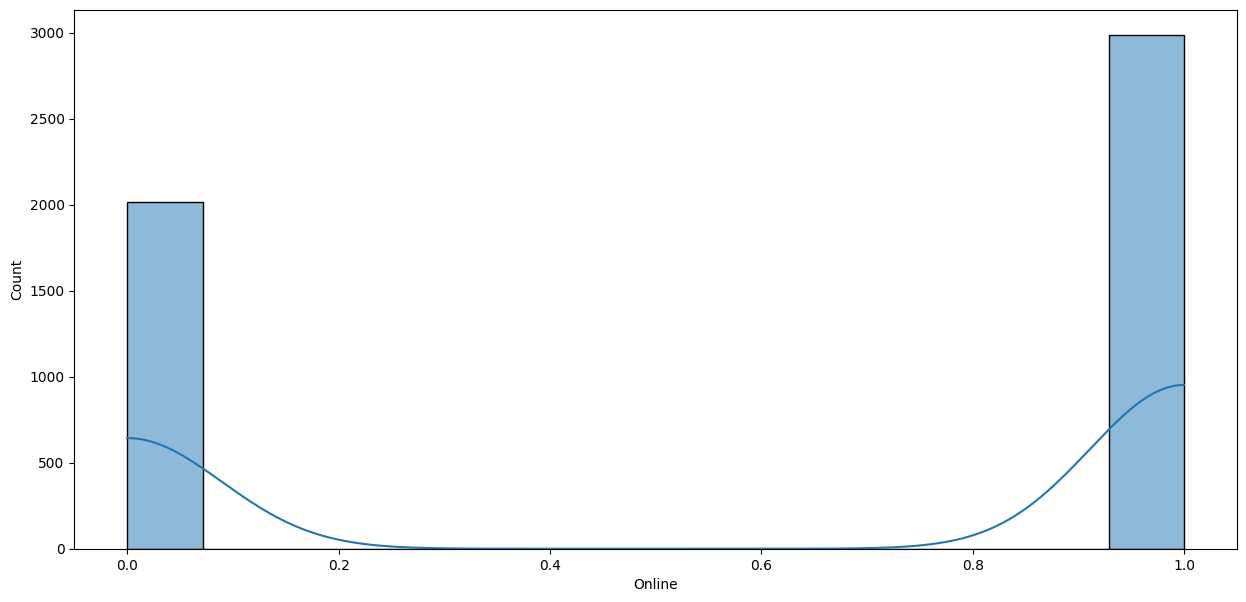

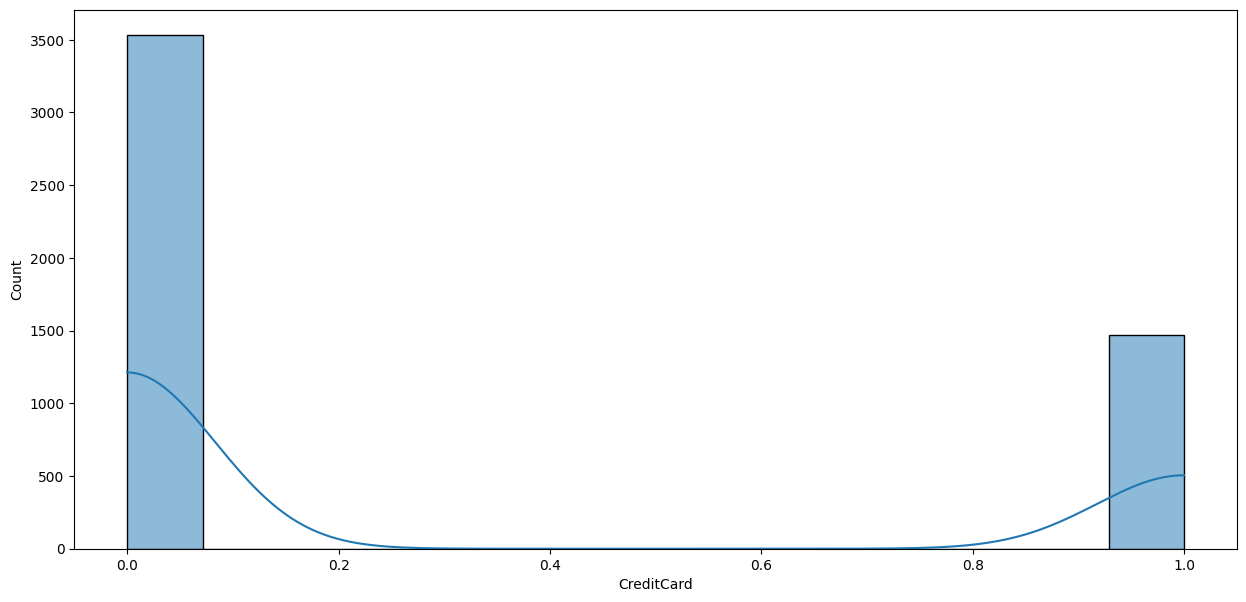

In [214]:
# Print the data distribution of each column of the dataframe
for column in df.columns:
    plt.figure(figsize=(15, 7))
    sns.histplot(data=df, x=column, kde=True)

Outliers

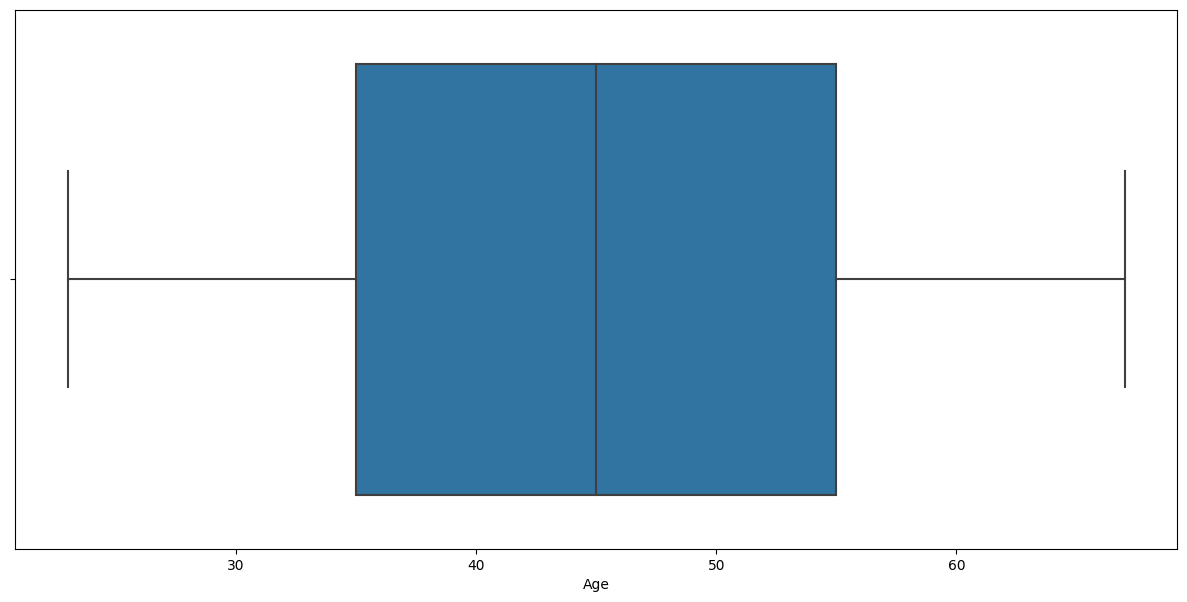

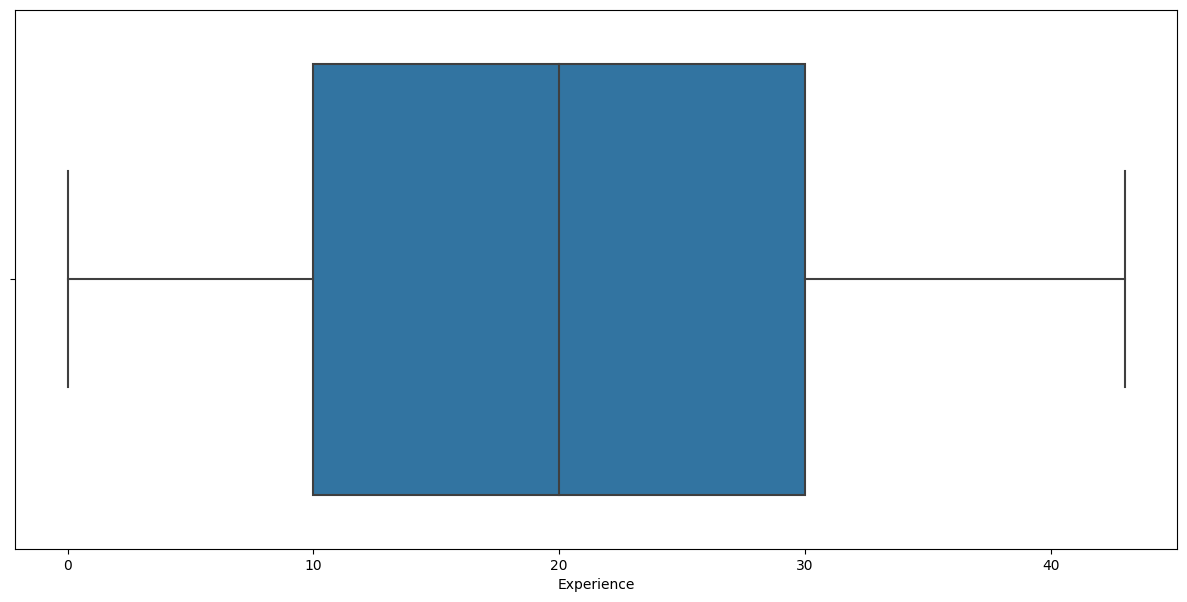

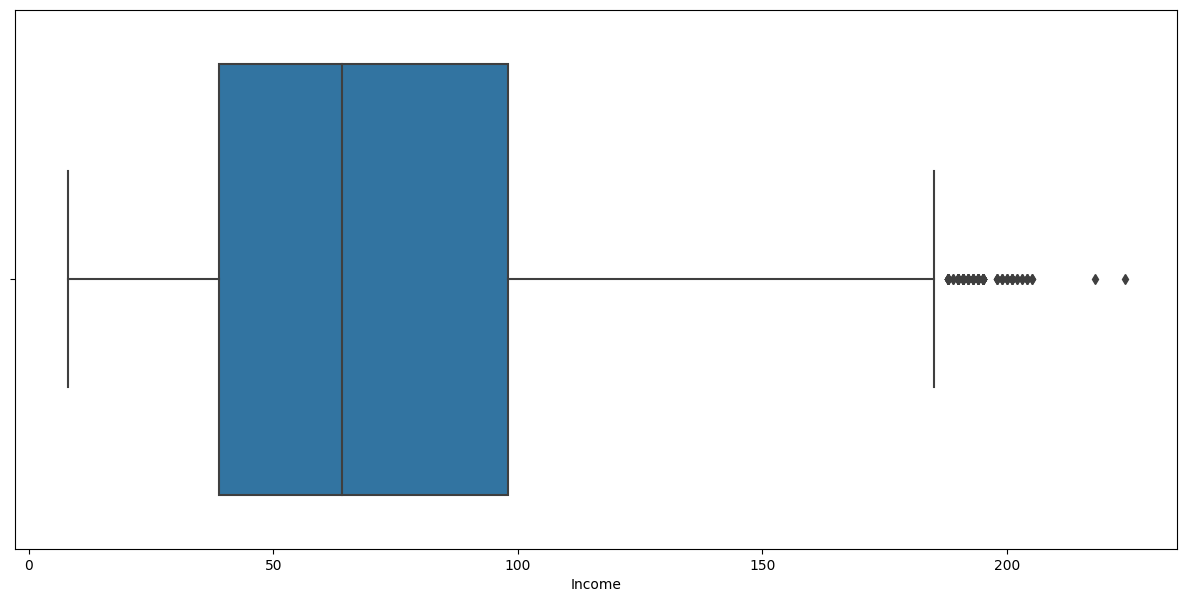

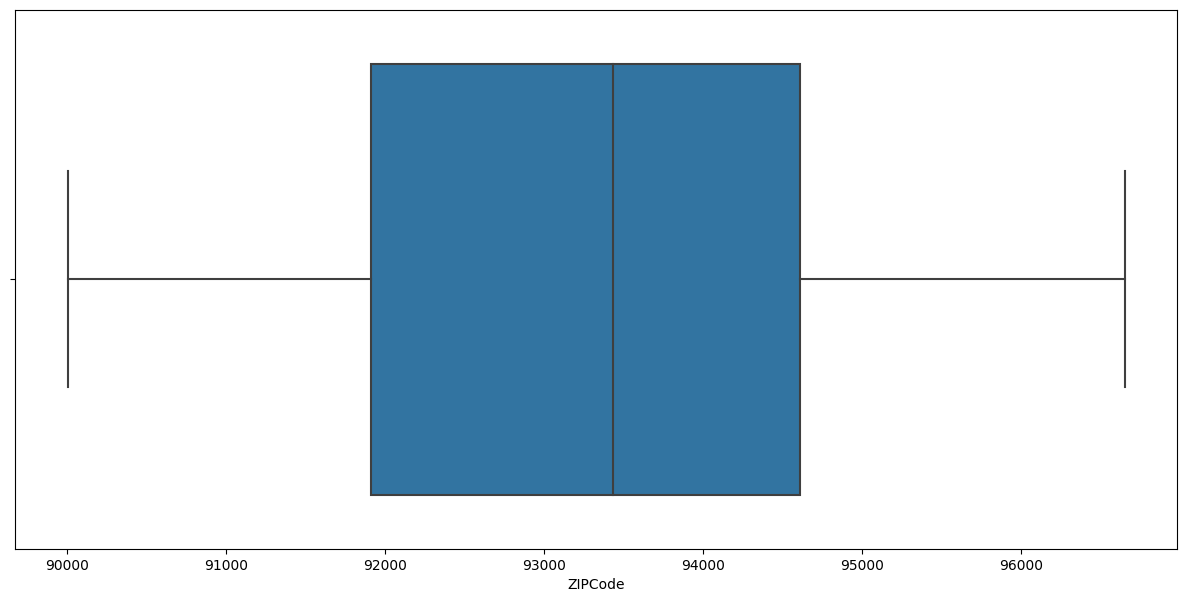

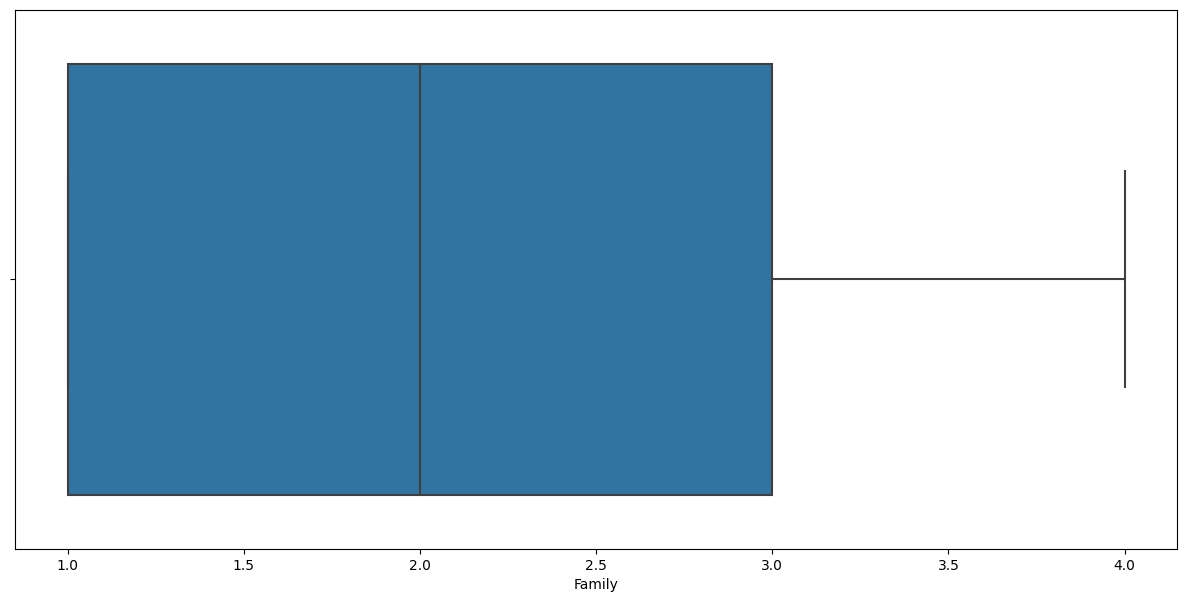

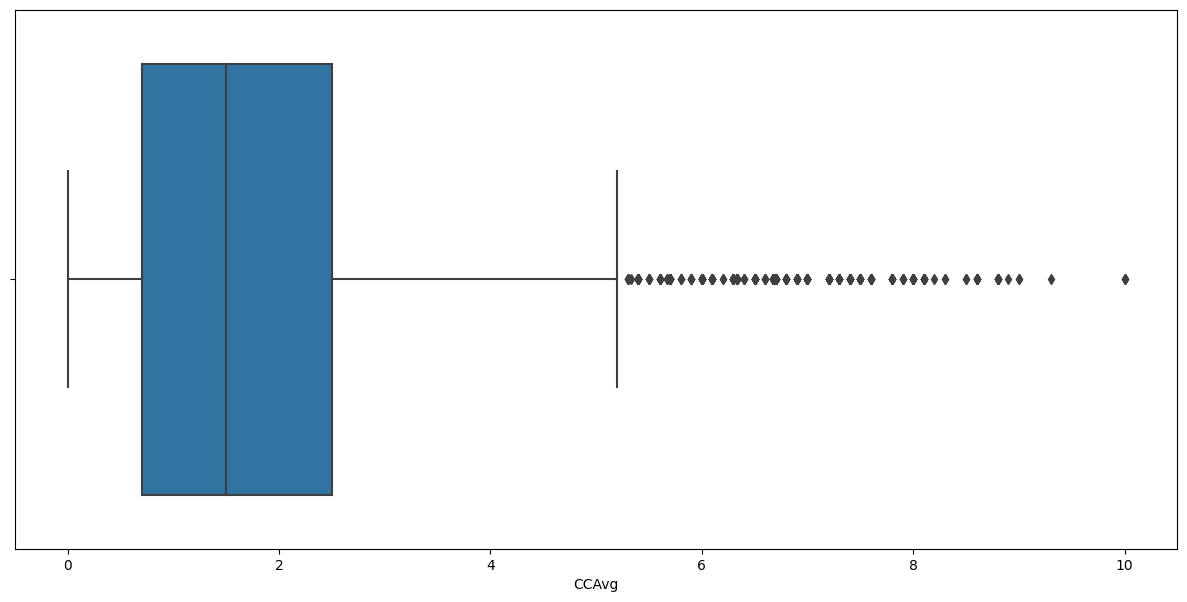

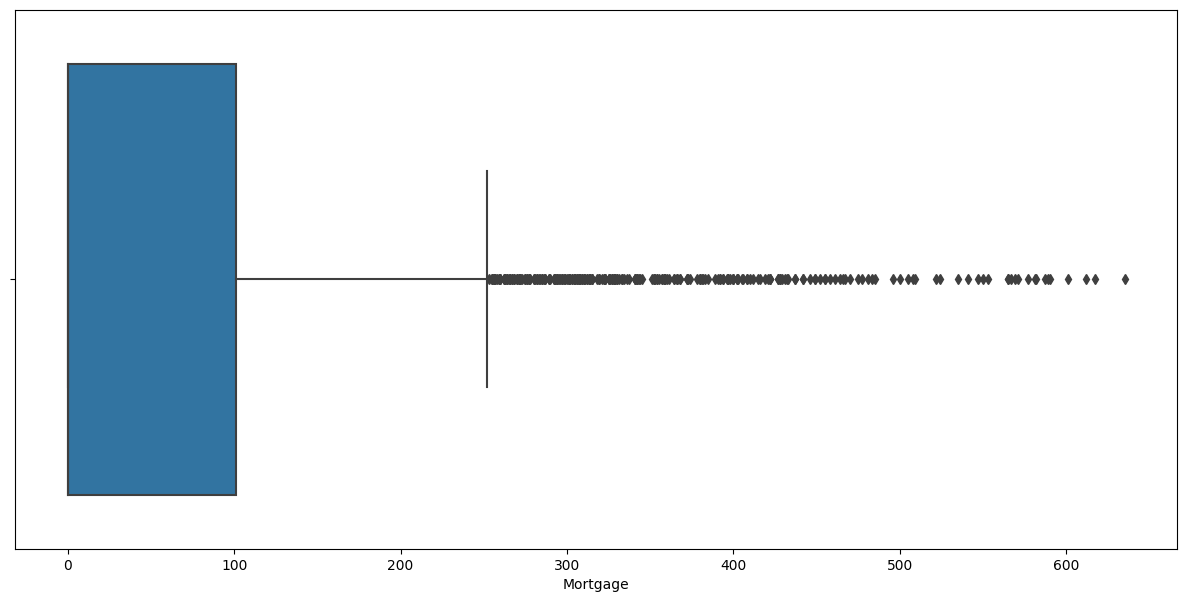

In [215]:
# Print the outliers distribution
for column in ['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Mortgage']:
    plt.figure(figsize=(15, 7))
    sns.boxplot(data=df, x=column)

Outliers treatment

In [216]:
# Find the first quartile, the third quartile, and the interquartile range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Inter Quantile Range (75th perentile - 25th percentile)
IQR = Q3 - Q1

# Define the lower and upper limits of the normal data range
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Percentage of outliers by column
((df < lower_limit) | (df > upper_limit)).sum() / len(df) * 100

Age                    0.00
Experience             0.00
Income                 1.92
ZIPCode                0.00
Family                 0.00
CCAvg                  6.48
Education              0.00
Mortgage               5.82
Personal_Loan          9.60
Securities_Account    10.44
CD_Account             6.04
Online                 0.00
CreditCard             0.00
dtype: float64

Personal_Loan, Securities_Account, CD_Account are Yes/No columns and the values will not be taken into account

Mortgage and CCavg have high percentage of outliers

Removing outliers from Mortgage column

In [217]:
# Identify any data points that fall outside the normal data range
outliersMortgage = df[df['Mortgage'] < lower_limit['Mortgage']
                      ] | df[df['Mortgage'] > upper_limit['Mortgage']]
# Remove the outliers from the dataframe
df = df.drop(outliersMortgage.index, axis=0)
df.shape

(4709, 13)

Checking the outliers percentage

In [218]:
# Percentage of outliers by column
((df < lower_limit) | (df > upper_limit)).sum() / len(df) * 100

Age                    0.000000
Experience             0.000000
Income                 1.571459
ZIPCode                0.000000
Family                 0.000000
CCAvg                  5.776173
Education              0.000000
Mortgage               0.000000
Personal_Loan          8.218305
Securities_Account    10.469314
CD_Account             5.415162
Online                 0.000000
CreditCard             0.000000
dtype: float64

CCAvg still have a high percentage of outliers

Removing the outliers from CCAvg column

In [219]:
# Identify any data points that fall outside the normal data range
outliersCCAvg = df[df['CCAvg'] < lower_limit['CCAvg']
                   ] | df[df['CCAvg'] > upper_limit['CCAvg']]
# Remove the outliers from the dataframe
df = df.drop(outliersCCAvg.index, axis=0)
df.shape

(4437, 13)

In [220]:
# Percentage of outliers by column
((df < lower_limit) | (df > upper_limit)).sum() / len(df) * 100

Age                    0.000000
Experience             0.000000
Income                 0.878972
ZIPCode                0.000000
Family                 0.000000
CCAvg                  0.000000
Education              0.000000
Mortgage               0.000000
Personal_Loan          6.558485
Securities_Account    10.434979
CD_Account             4.778003
Online                 0.000000
CreditCard             0.000000
dtype: float64

Data preparation for modeling

In [221]:
# Separate independent and dependent variable
x = df.drop(["Personal_Loan"], axis=1)
y = df["Personal_Loan"]

# Splitting data into training and test set:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=1)

# Printing information about train and test data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])
print("Percentage of classes in training set:",
      y_train.value_counts(normalize=True))
print("Percentage of classes in test set:",
      y_test.value_counts(normalize=True))

Number of rows in train data = 3105
Number of rows in test data = 1332
Percentage of classes in training set: Personal_Loan
0    0.937842
1    0.062158
Name: proportion, dtype: float64
Percentage of classes in test set: Personal_Loan
0    0.926426
1    0.073574
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

### Model can make wrong predictions as:

1. Predicting a customer will take a loan when they actually will not

2. Predicting a customer will not take a loan when they actually will

### Which case is more important? 

* The case 2 is more important.This is because it can lead to a loss for the lender.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

### Model Building: Logistic Regression

In [222]:
# fitting logistic regression model
logit = sm.Logit(y_train, x_train)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3105
Model:                          Logit   Df Residuals:                     3093
Method:                           MLE   Df Model:                           11
Date:                Sat, 10 Jun 2023   Pseudo R-squ.:                  0.6512
Time:                        00:00:09   Log-Likelihood:                -252.23
converged:                       True   LL-Null:                       -723.04
Covariance Type:            nonrobust   LLR p-value:                6.929e-195
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.2454      0.096     -2.556      0.011      -0.434      -0.057
Experience             0.2358      0.096      2.460      0.014       0.048       0.424
Income              

### Observations

- The model has a pseudo R-squared of 0.6512, which indicates that the model explains 65.12% of the variation in the dependent variable, Personal_Loan. This is a relatively good fit for a logistic regression model.

- The coefficients for Age, Experience, Income, ZIPCode, Family, CCAvg, Education, and Mortgage are all statistically significant. This means that these variables are all associated with the probability of taking out a personal loan.

- Negative values of the coefficient show that the probability of a person of taking out a personal loan decreases with the increase of the corresponding attribute value.
 
- Positive values of the coefficient show that the probability of a person of taking out a personal loan increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.



In [223]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, },
        index=[0],
    )

    return df_perf

# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) +
             "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

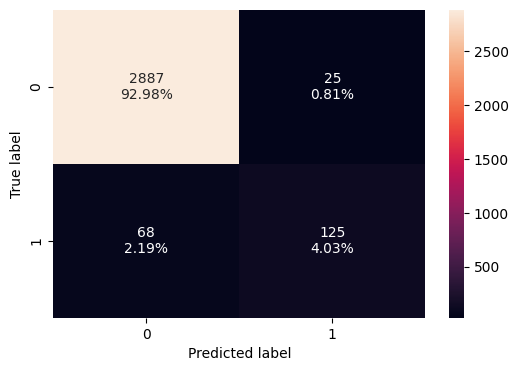

In [224]:
confusion_matrix_statsmodels(lg, x_train, y_train)

Train performance

In [225]:
model_performance_classification_statsmodels(lg, x_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.970048,0.647668,0.833333,0.728863


Test performance

In [226]:
model_performance_classification_statsmodels(lg, x_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.95045,0.5,0.742424,0.597561


### Model Performance Improvement: Logistic Regression

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

General Rule of thumb:
  - If VIF is 1 then there is no correlation among the predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

In [227]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i)
     for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

Age                   1321.272418
Experience             328.767236
Income                   5.279677
ZIPCode                378.160349
Family                   5.610381
CCAvg                    3.828702
Education                6.770196
Mortgage                 1.324530
Securities_Account       1.284347
CD_Account               1.349366
Online                   2.611648
CreditCard               1.554974
dtype: float64



In [228]:
x_train1 = x_train.drop('Age', axis=1)
x_test1 = x_test.drop('Age', axis=1)

vif_series = pd.Series(
    [variance_inflation_factor(x_train1.values, i)
     for i in range(x_train1.shape[1])],
    index=x_train1.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

Experience             4.120057
Income                 5.277348
ZIPCode               22.330119
Family                 5.603378
CCAvg                  3.810217
Education              6.420808
Mortgage               1.324524
Securities_Account     1.282804
CD_Account             1.346788
Online                 2.611264
CreditCard             1.554973
dtype: float64



In [229]:
logit1 = sm.Logit(y_train, x_train1)
lg1 = logit1.fit(disp=False)

Training performance

In [230]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, x_train1, y_train)
log_reg_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.97037,0.65285,0.834437,0.732558


Test performance

In [231]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, x_test1, y_test)
log_reg_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.951952,0.5,0.765625,0.604938


### Observations

- Dropping Age doesn't have a significant impact on the model performance.
- We can choose any model to proceed to the next steps.


ROC Curve and ROC-AUC

ROC-AUC on training set

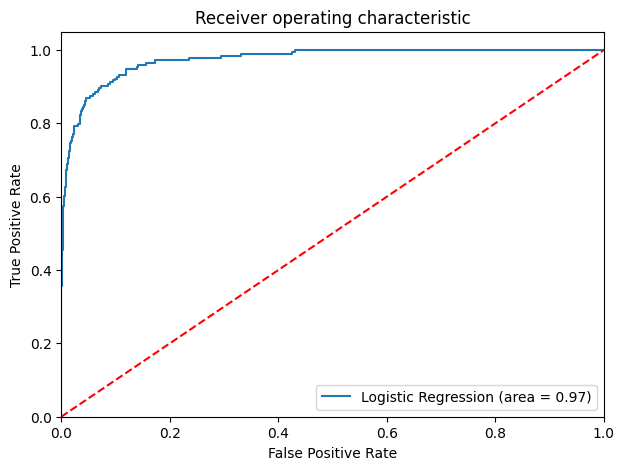

In [232]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(x_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" %
         logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Logistic Regression model is giving a good performance on training set.

Optimal threshold using AUC-ROC curve


In [233]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(x_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.03589693977783063


Checking model performance on training set

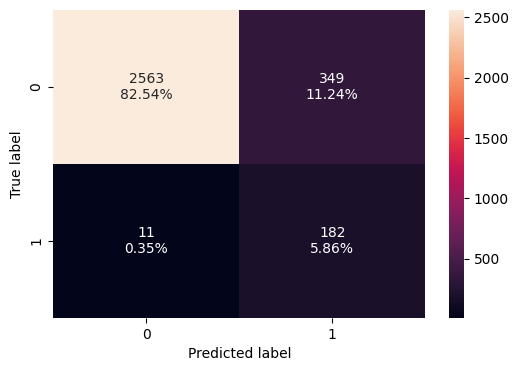

In [234]:
confusion_matrix_statsmodels(
    lg1, x_train1, y_train, threshold=optimal_threshold_auc_roc
)

Training performance

In [235]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, x_train1, y_train, threshold=optimal_threshold_auc_roc
)
log_reg_model_train_perf_threshold_auc_roc

,Accuracy,Recall,Precision,F1
0,0.884058,0.943005,0.34275,0.502762


### Observations

- Recall of model has increased but the other metrics have reduced.
- The model is still giving a good performance.

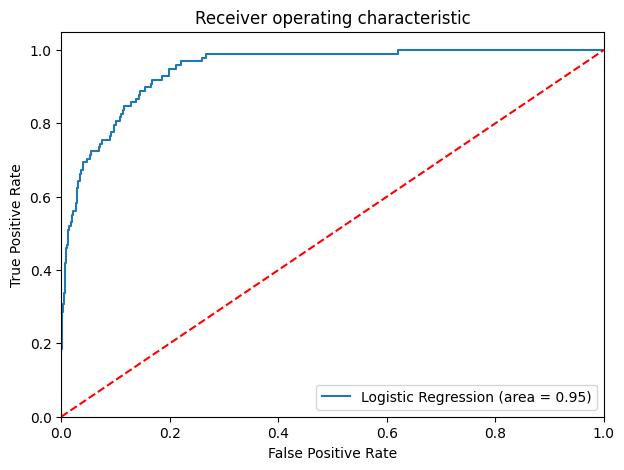

In [236]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(x_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(x_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" %
         logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

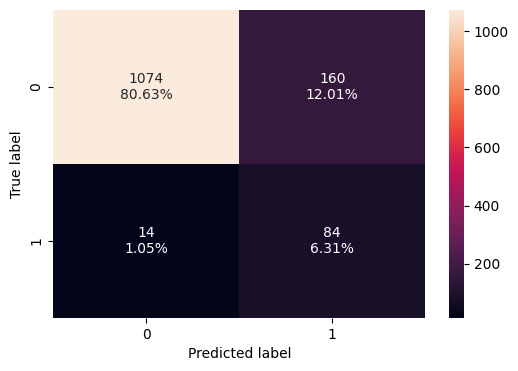

In [237]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, x_test1, y_test, threshold=optimal_threshold_auc_roc)

Test performance

In [238]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, x_test1, y_test, threshold=optimal_threshold_auc_roc
)
log_reg_model_test_perf_threshold_auc_roc

,Accuracy,Recall,Precision,F1
0,0.869369,0.857143,0.344262,0.491228


Precision-Recall Curve

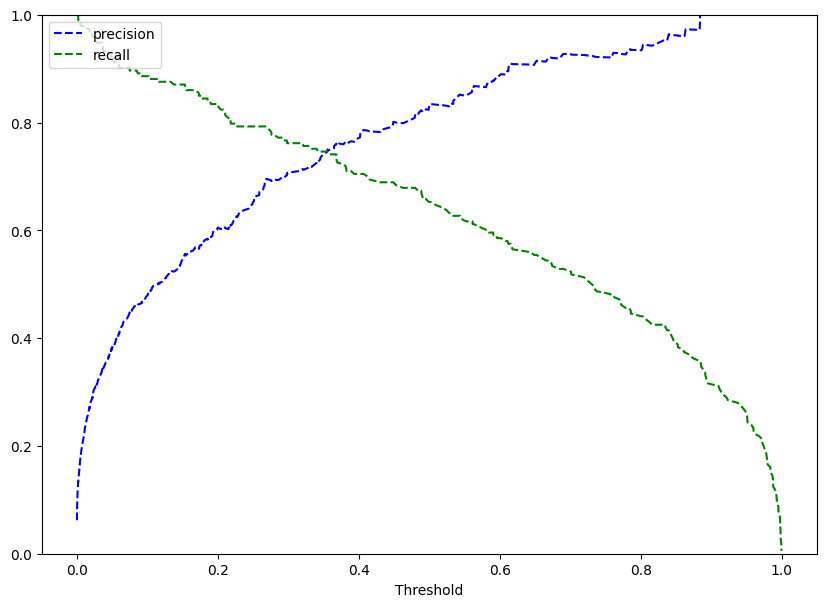

In [239]:
y_scores = lg1.predict(x_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

At the threshold of 0.35, we get balanced recall and precision.

In [240]:
optimal_threshold_curve = 0.35

Checking model performance on training set

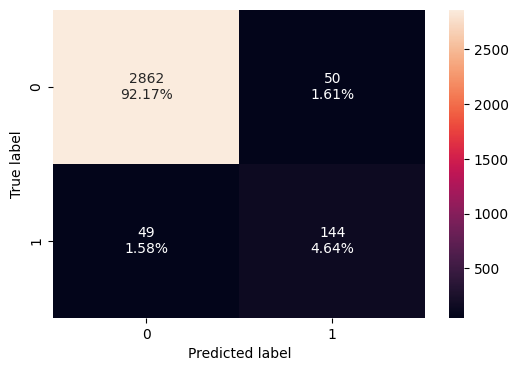

In [241]:
confusion_matrix_statsmodels(
    lg1, x_train1, y_train, threshold=optimal_threshold_curve)

Training performance

In [242]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, x_train1, y_train, threshold=optimal_threshold_curve
)
log_reg_model_train_perf_threshold_curve

,Accuracy,Recall,Precision,F1
0,0.968116,0.746114,0.742268,0.744186


Test performance

In [243]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, x_test1, y_test, threshold=optimal_threshold_curve
)
log_reg_model_test_perf_threshold_curve

,Accuracy,Recall,Precision,F1
0,0.943694,0.561224,0.632184,0.594595


- Model is performing well on training set.
- There's too much improvement in the model performance as the threshold 0.35

### Model Performance Comparison: Logistic Regression

In [244]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-2 Threshold",
    "Logistic Regression-3 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-2 Threshold,Logistic Regression-3 Threshold
Accuracy,0.970370,0.884058,0.968116
Recall,0.652850,0.943005,0.746114
Precision,0.834437,0.342750,0.742268
F1,0.732558,0.502762,0.744186


In [245]:
# Test performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.035 Threshold",
    "Logistic Regression-0.35 Threshold",
]

print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.035 Threshold,Logistic Regression-0.35 Threshold
Accuracy,0.951952,0.869369,0.943694
Recall,0.500000,0.857143,0.561224
Precision,0.765625,0.344262,0.632184
F1,0.604938,0.491228,0.594595


### Observations

The logistic regressions with different thresholds show that changing the threshold can impact the accuracy, recall, precision, and F1 scores of the model.

The default threshold of 0.5 results in an accuracy of 95.19%, a recall of 50.00%, a precision of 76.56%, and an F1 score of 60.49%. This means that the model correctly predicted 95.19% of the data, but it only correctly identified 50.00% of the positive cases. This is likely because the threshold is too high, and the model is not confident enough to predict positive cases.

The logistic regression with a threshold of 0.035 results in an accuracy of 86.94%, a recall of 85.71%, a precision of 34.43%, and an F1 score of 49.12%. This means that the model correctly predicted 86.94% of the data, but it only correctly identified 85.71% of the positive cases. This is likely because the threshold is too low, and the model is predicting positive cases that are actually negative.

The logistic regression with a threshold of 0.35 results in an accuracy of 94.37%, a recall of 56.12%, a precision of 63.22%, and an F1 score of 59.46%. This means that the model correctly predicted 94.37% of the data, but it only correctly identified 56.12% of the positive cases. This is likely because the threshold is a good balance between being too high and too low, and the model is able to correctly identify both positive and negative cases.

### Model Building: Decision Tree

In [246]:
tree_model = DecisionTreeClassifier(
    criterion="gini", random_state=1
)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [247]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1, },
        index=[0],
    )

    return df_perf

In [248]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) +
             "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

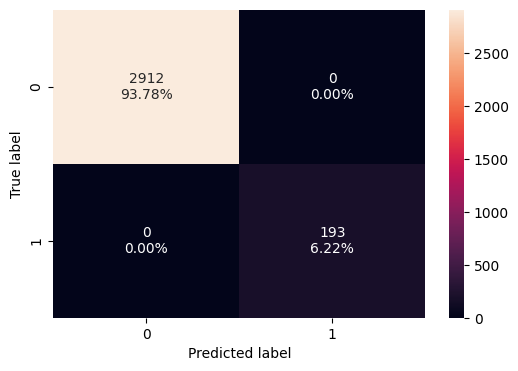

In [249]:
confusion_matrix_sklearn(tree_model, x_train, y_train)

Train performance

In [250]:
decision_tree_perf_train = model_performance_classification_sklearn(
    tree_model, x_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Observations

- The model has a zero error rate on the training set.
- The model has achieved perfect accuracy on the training set.
- The model has learned the training set perfectly.
- The model has overfit the training set.

### Checking model performance on test

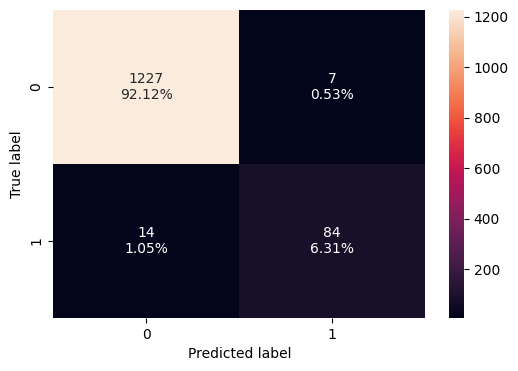

In [251]:
confusion_matrix_sklearn(tree_model, x_test, y_test)

Test performance

In [252]:
decision_tree_perf_test = model_performance_classification_sklearn(
    tree_model, x_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.984234,0.857143,0.923077,0.888889


### Visualizing the decision tree

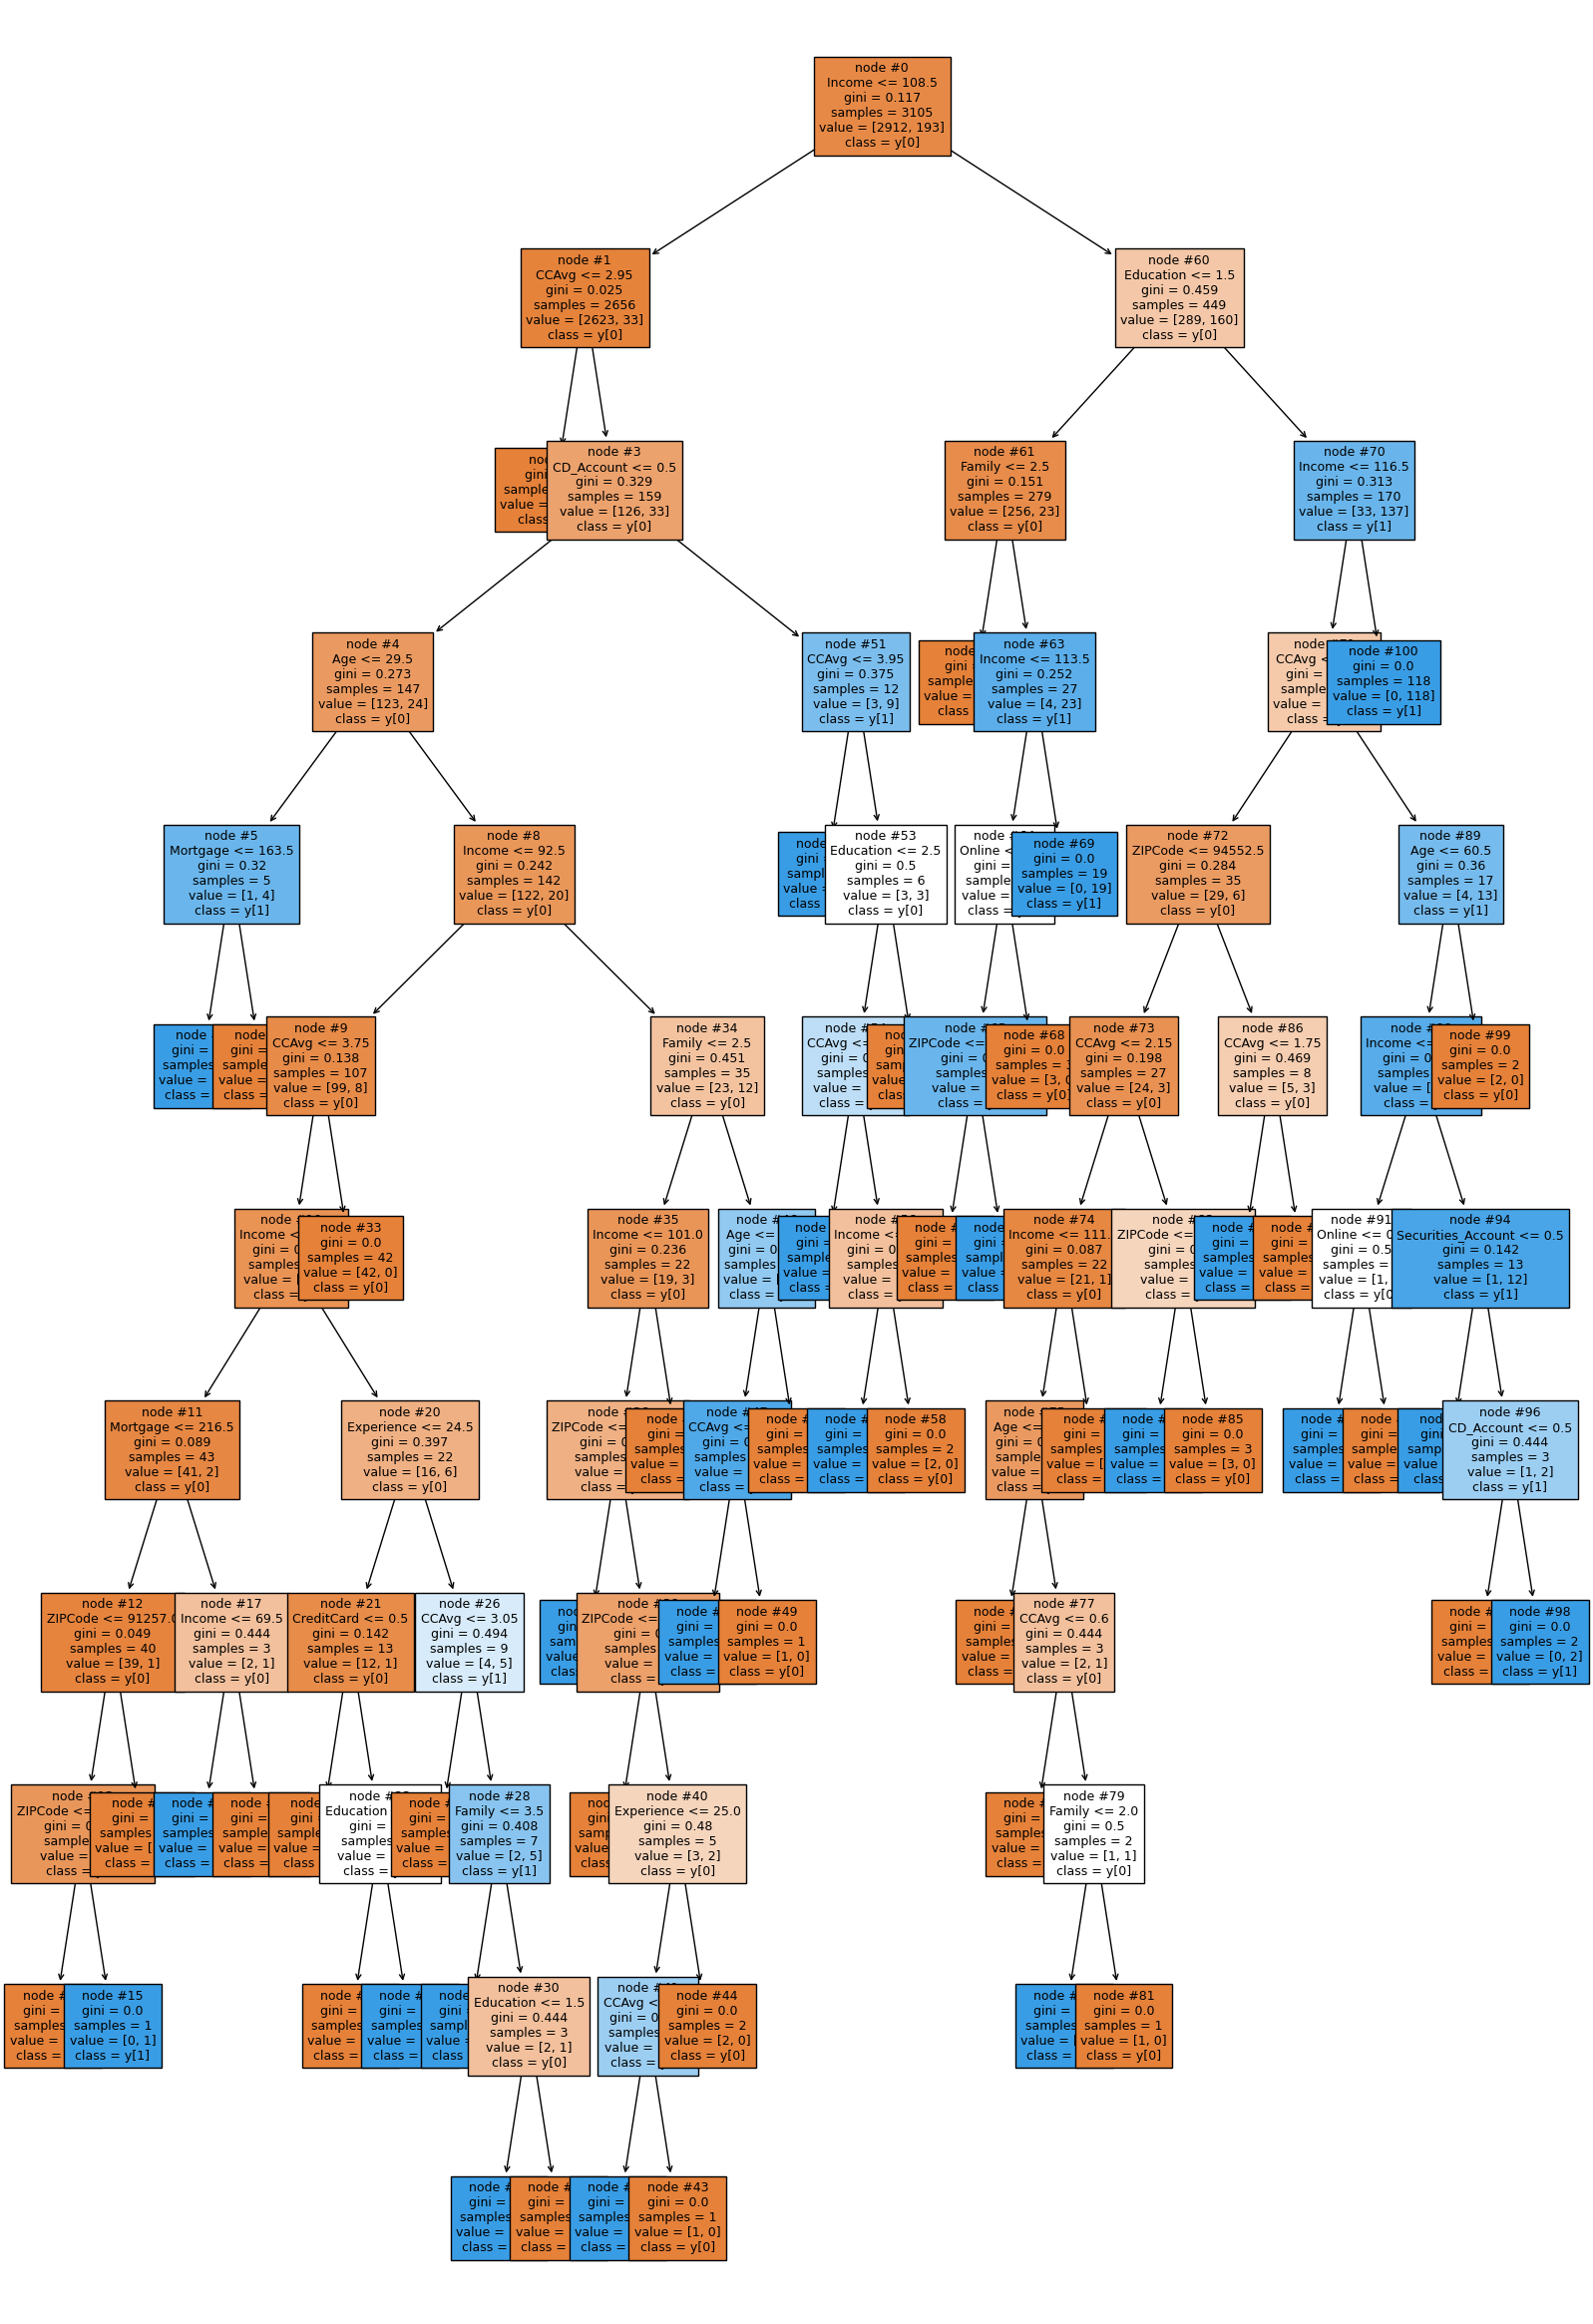

In [253]:
feature_names = list(x.columns)
plt.figure(figsize=(20, 30))
tree.plot_tree(tree_model, feature_names=feature_names,
               filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [254]:
tree_model.tree_.node_count

101

In [255]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        tree_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.365668
Education           0.313546
Family              0.118694
CCAvg               0.094199
Age                 0.030165
CD_Account          0.024784
ZIPCode             0.024235
Experience          0.009678
Online              0.009392
Mortgage            0.005886
CreditCard          0.002337
Securities_Account  0.001417


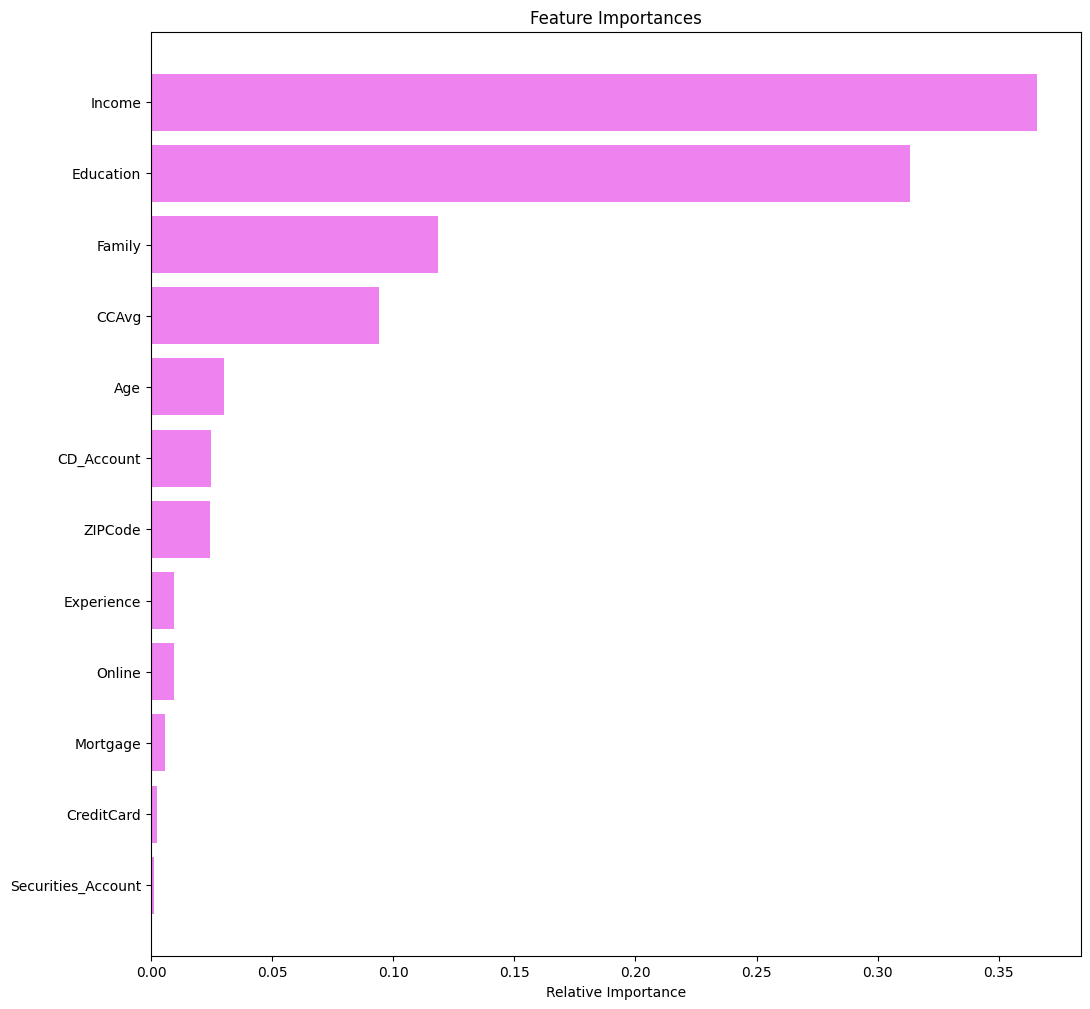

In [256]:
importances = tree_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)),
         importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the personal_loan.

### Model Performance Improvement: Decision Tree

### Using GridSearch for Hyperparameter tuning of our tree model

In [257]:
# # Choose the type of classifier.
# estimator = DecisionTreeClassifier(random_state=1)

# # Grid of parameters to choose from
# # add from article
# parameters = {'max_depth': np.arange(1, 10),
#               'min_samples_leaf': [1, 2, 5, 7, 10, 15, 20],
#               'max_leaf_nodes': [2, 3, 5, 10],
#               'min_impurity_decrease': [0.001, 0.01, 0.1]
#               }

# # Type of scoring used to compare parameter combinations
# acc_scorer = metrics.make_scorer(metrics.recall_score)

# # Run the grid search
# grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
# grid_obj = grid_obj.fit(x_train, y_train)

# # Set the clf to the best combination of parameters
# estimator = grid_obj.best_estimator_

# # Fit the best algorithm to the data.
# estimator.fit(x_train, y_train)


# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

estimator.fit(x_train, y_train)  # Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=7,
                       random_state=1)

### Tuned hyperparameters

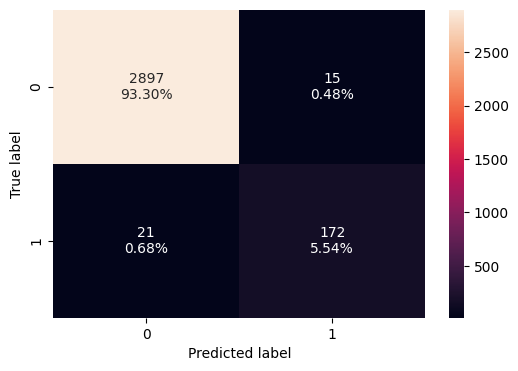

In [258]:
confusion_matrix_sklearn(estimator, x_train, y_train)

Training performance

In [259]:
decision_tree_estimator_train = model_performance_classification_sklearn(
    estimator, x_train, y_train)
decision_tree_estimator_train

,Accuracy,Recall,Precision,F1
0,0.988406,0.891192,0.919786,0.905263


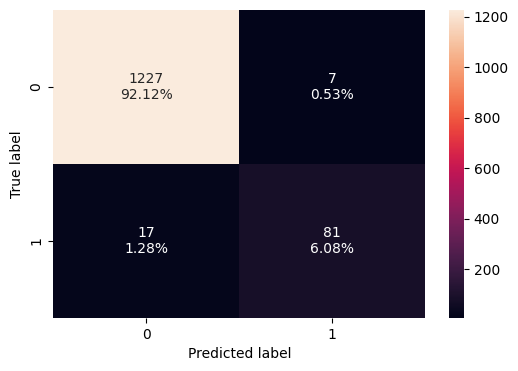

In [260]:
confusion_matrix_sklearn(estimator, x_test, y_test)

Test performance

In [261]:
decision_tree_estimator_test = model_performance_classification_sklearn(
    estimator, x_test, y_test)
decision_tree_estimator_test

,Accuracy,Recall,Precision,F1
0,0.981982,0.826531,0.920455,0.870968


## Visualizing the Decision Tree

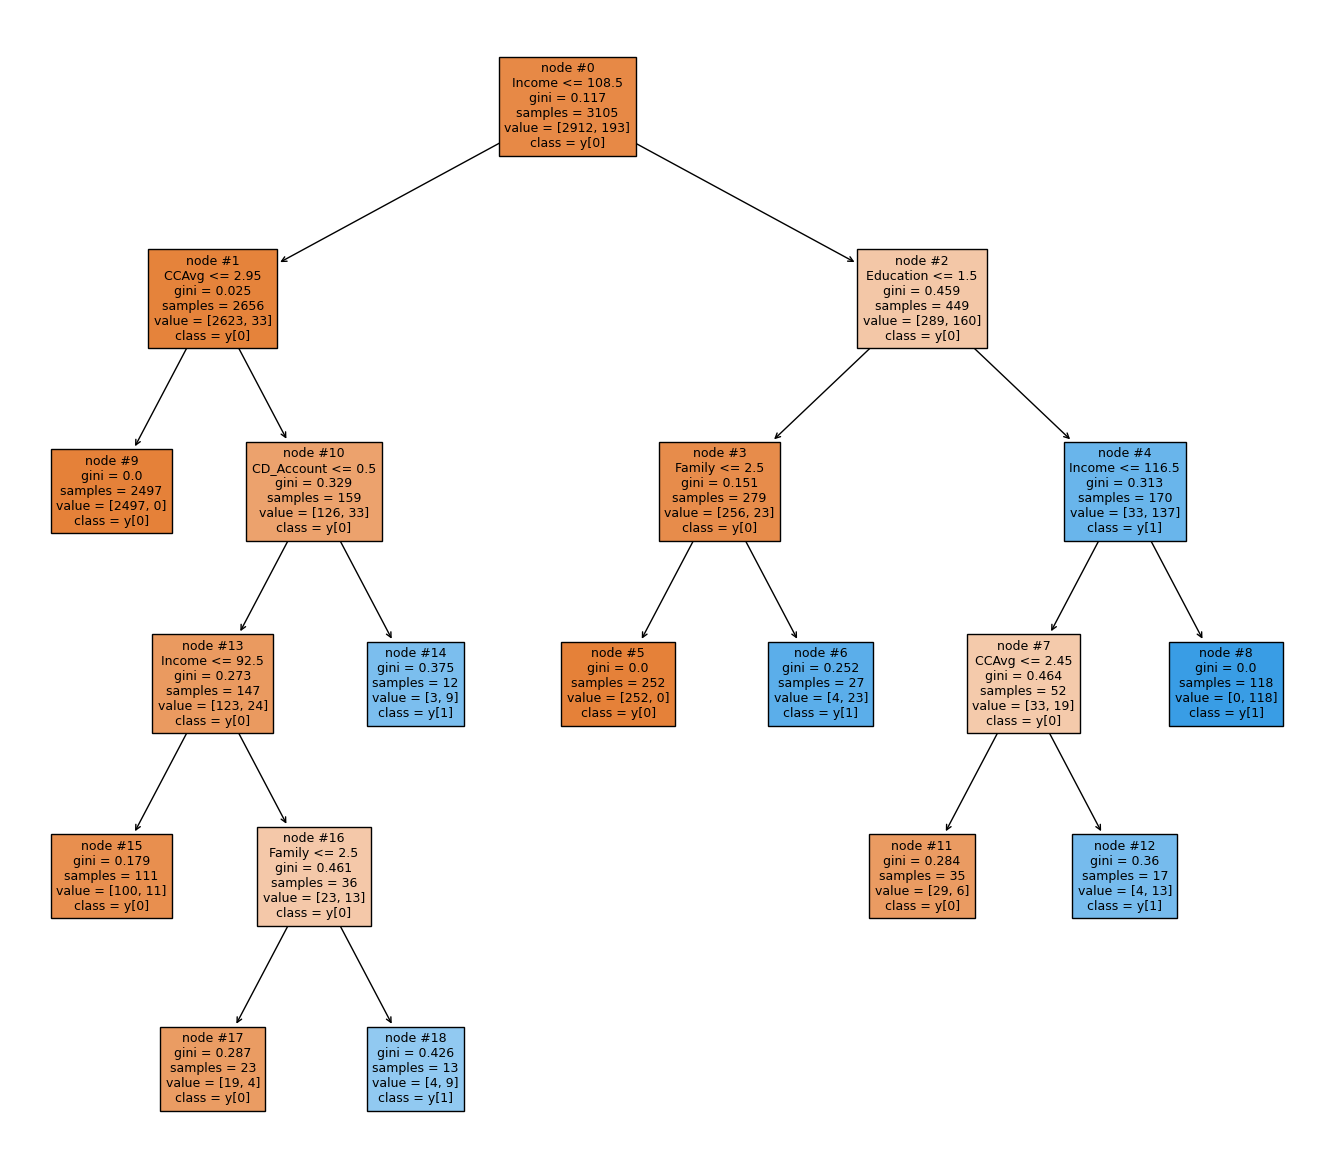

In [262]:
plt.figure(figsize=(17, 15))

tree.plot_tree(estimator, feature_names=feature_names,
               filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [263]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(estimator.feature_importances_, columns=[
      "Imp"], index=x_train.columns).sort_values(by='Imp', ascending=False))

# Here we will see that importance of features has increased

                         Imp
Income              0.408582
Education           0.365331
Family              0.131687
CCAvg               0.069162
CD_Account          0.025238
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


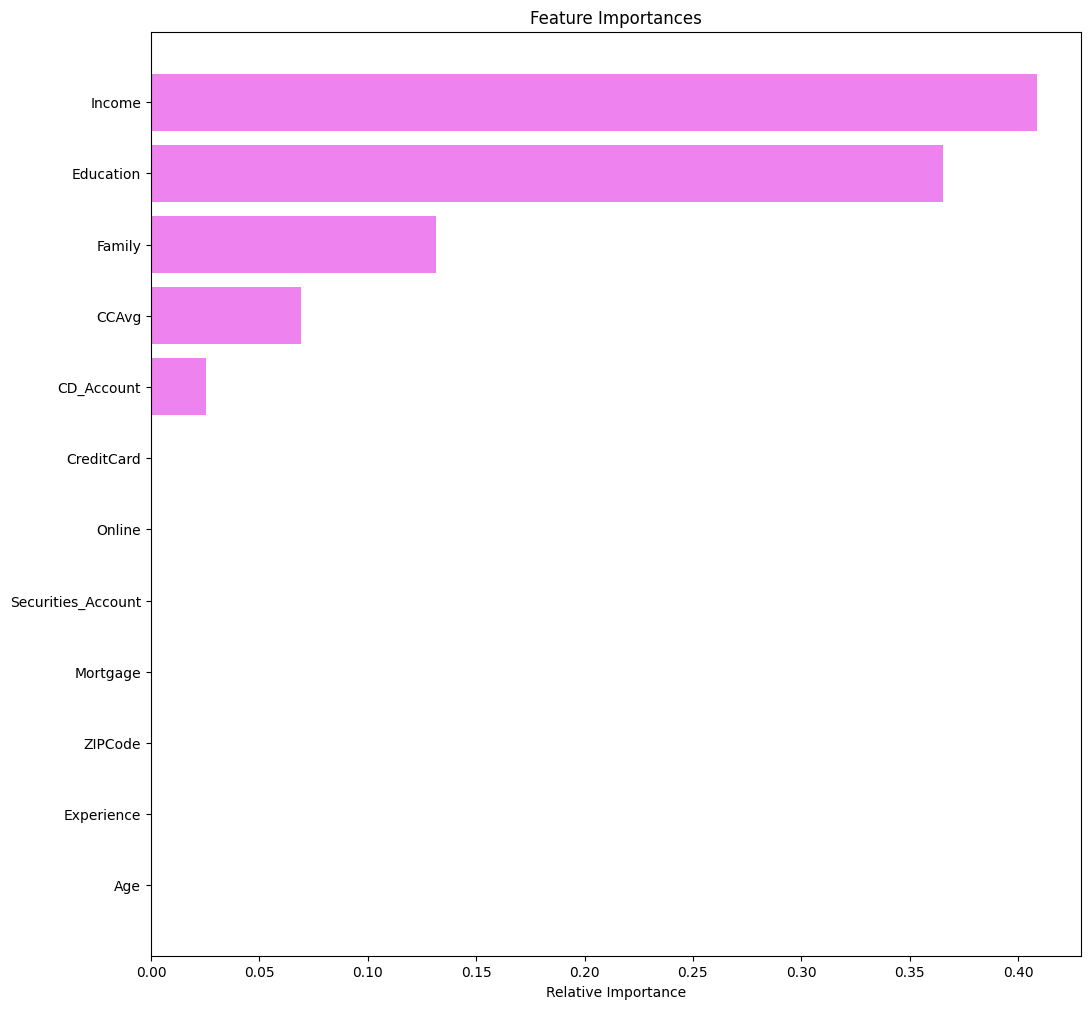

In [264]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),
         importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Cost Complexity Pruning

In [265]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000154,0.000615
2,0.000279,0.001731
3,0.000297,0.002326
4,0.000307,0.003554
5,0.000322,0.004520
6,0.000334,0.006189
7,0.000429,0.006619
8,0.000483,0.007102
9,0.000491,0.007593


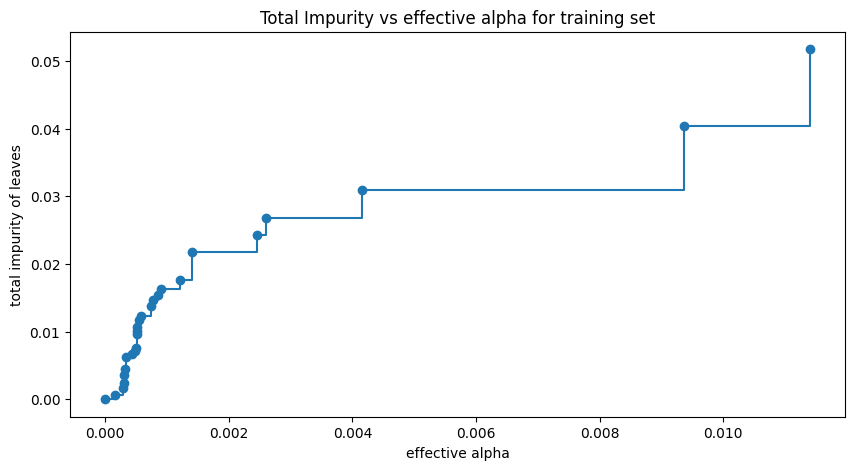

In [266]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [267]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    # Complete the code to fit decision tree on training data
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.032436553118827774



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

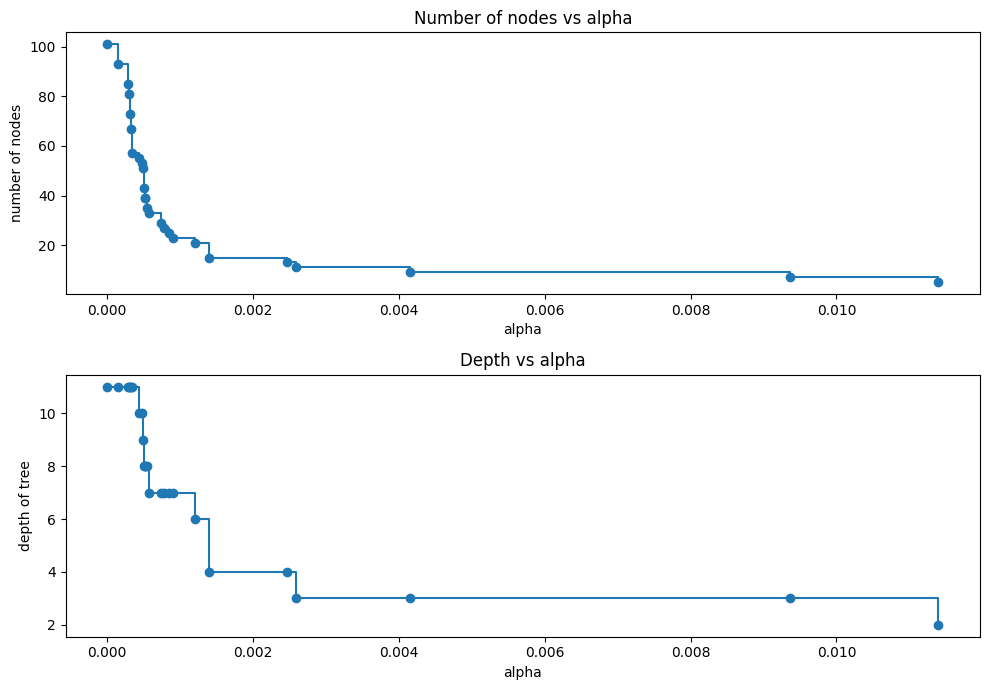

In [268]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Accuracy vs alpha for training and testing sets

When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training accuracy and 69% testing accuracy. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

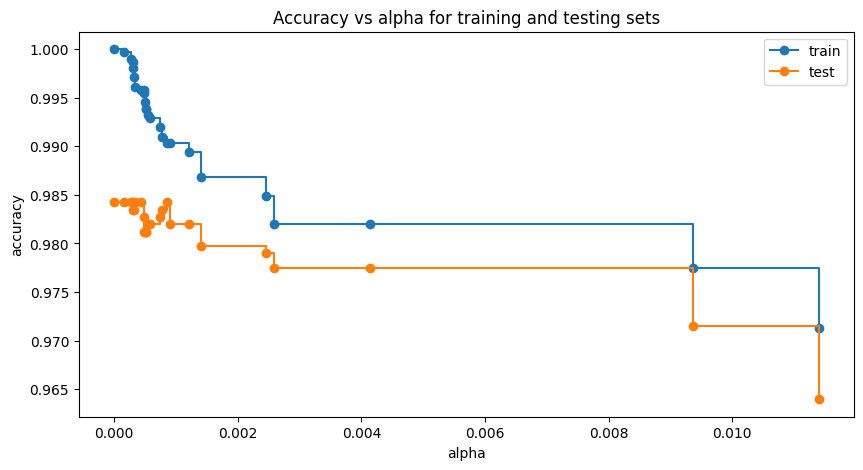

In [269]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [270]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [271]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ', best_model.score(x_train, y_train))
print('Test accuracy of best model: ', best_model.score(x_test, y_test))

DecisionTreeClassifier(random_state=1)
Training accuracy of best model:  1.0
Test accuracy of best model:  0.9842342342342343


### Since accuracy isn't the right metric for our data we would want high recall

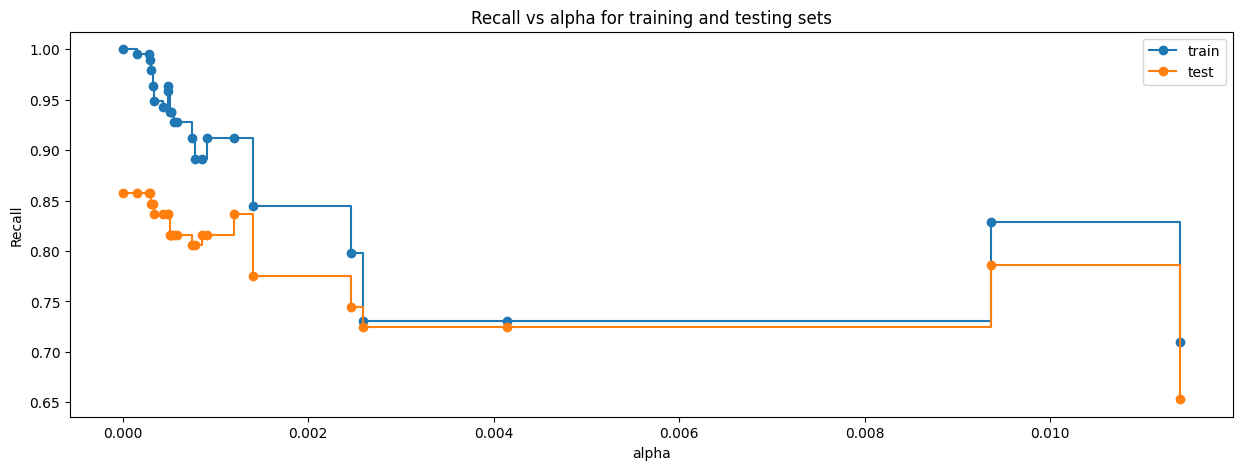

In [272]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(x_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(x_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [273]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


### Post-pruned decision tree

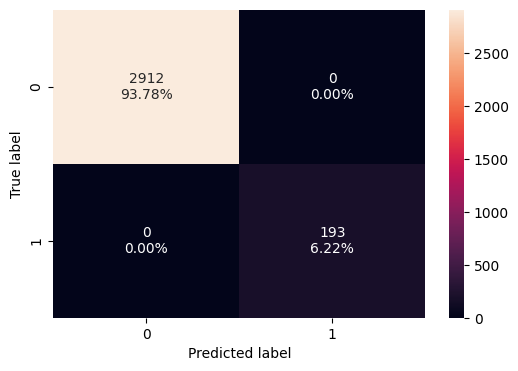

In [274]:
confusion_matrix_sklearn(best_model, x_train, y_train)

Train performance

In [275]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    best_model, x_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


### Checking model performance on test

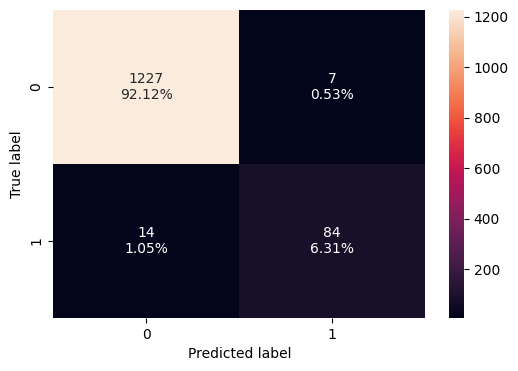

In [276]:
confusion_matrix_sklearn(best_model, x_test, y_test)

Test performance

In [277]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    best_model, x_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.984234,0.857143,0.923077,0.888889


### Visualizing the Decision Tree

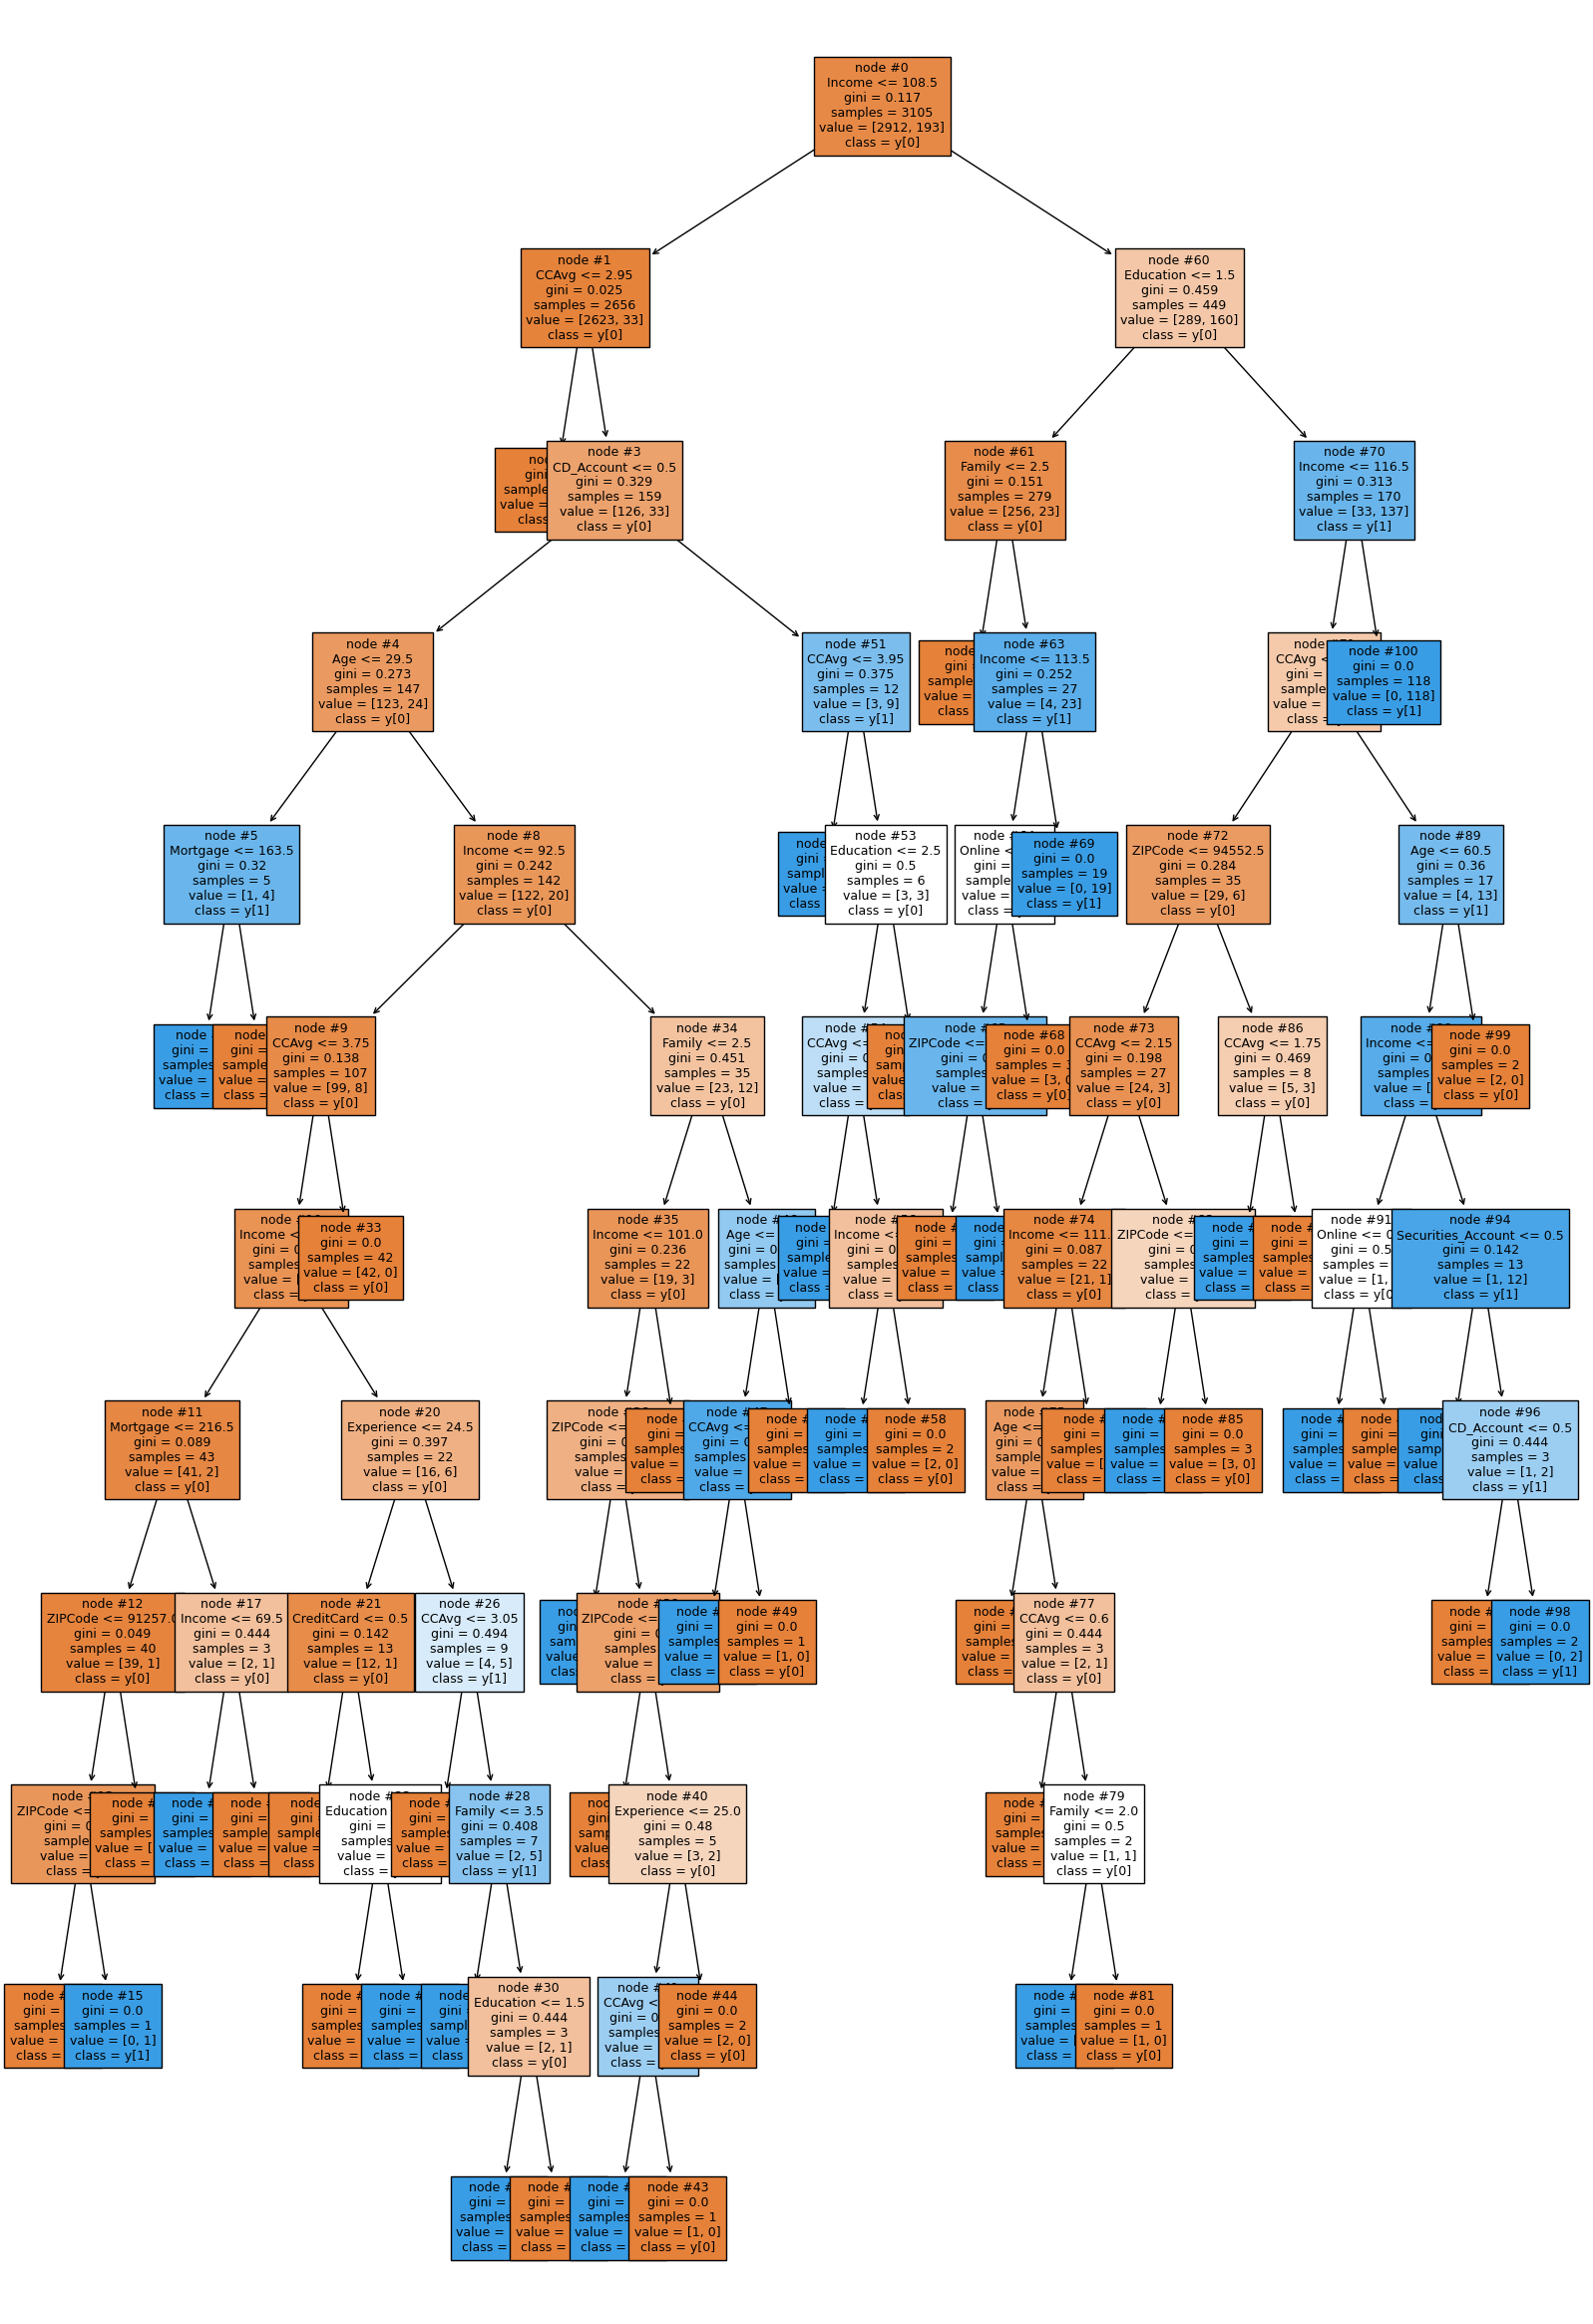

In [278]:
plt.figure(figsize=(20, 30))

tree.plot_tree(best_model, feature_names=feature_names,
               filled=True, fontsize=9, node_ids=True, class_names=True)
plt.show()

In [279]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(best_model.feature_importances_, columns=[
      "Imp"], index=x_train.columns).sort_values(by='Imp', ascending=False))

                         Imp
Income              0.365668
Education           0.313546
Family              0.118694
CCAvg               0.094199
Age                 0.030165
CD_Account          0.024784
ZIPCode             0.024235
Experience          0.009678
Online              0.009392
Mortgage            0.005886
CreditCard          0.002337
Securities_Account  0.001417


In [280]:
best_model.tree_.node_count

101

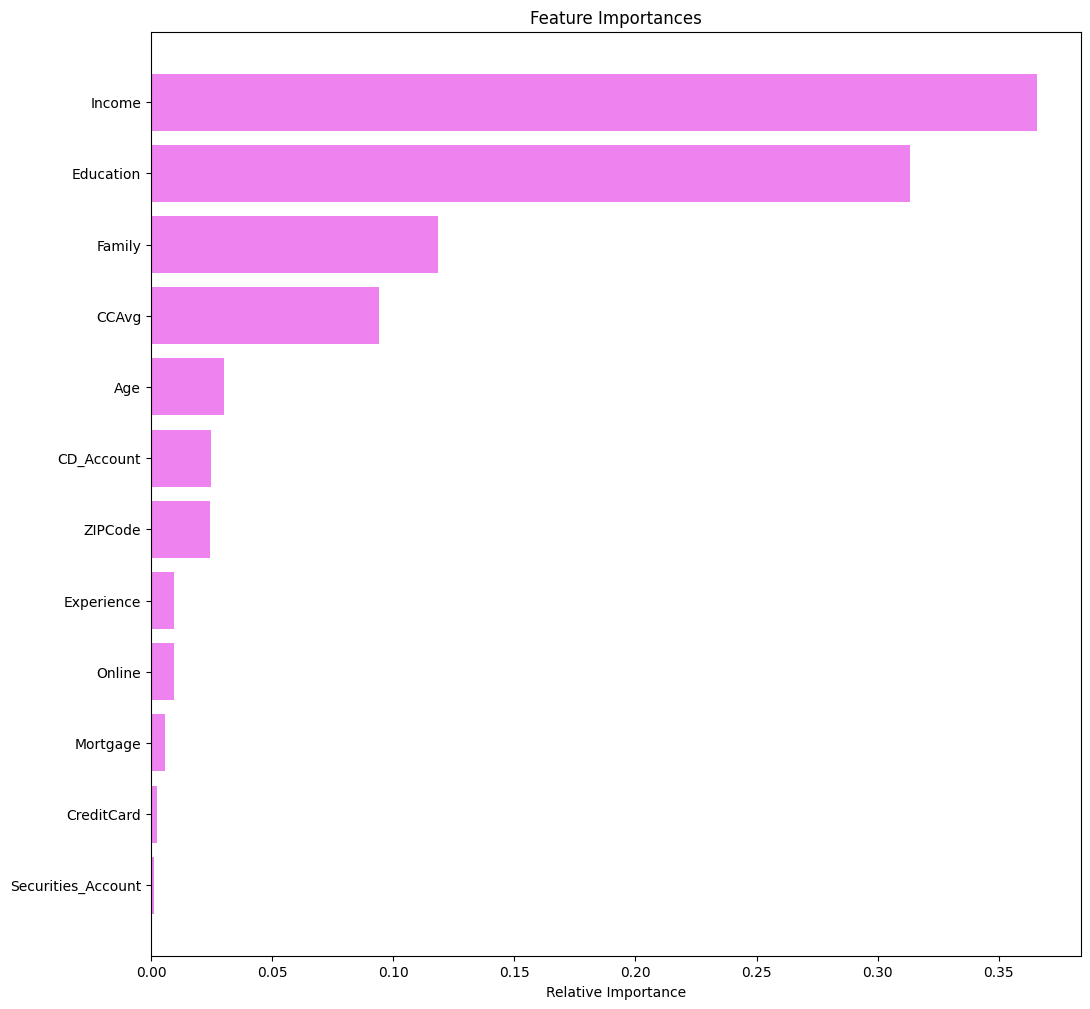

In [281]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)),
         importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation

- Income and Education of loan are the most important features.

In [282]:

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_estimator_train.T,
        decision_tree_tune_perf_train.T], axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn", "Decision Tree Tuned hyperparameters", "Decision Tree Cost Complexity Pruning"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree Tuned hyperparameters,Decision Tree Cost Complexity Pruning
Accuracy,1.0,0.988406,1.0
Recall,1.0,0.891192,1.0
Precision,1.0,0.919786,1.0
F1,1.0,0.905263,1.0


In [283]:
models_train_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_estimator_test.T,
        decision_tree_tune_perf_test.T], axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn", "Decision Tree Tuned hyperparameters", "Decision Tree Cost Complexity Pruning"]
print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree Tuned hyperparameters,Decision Tree Cost Complexity Pruning
Accuracy,0.984234,0.981982,0.984234
Recall,0.857143,0.826531,0.857143
Precision,0.923077,0.920455,0.923077
F1,0.888889,0.870968,0.888889


## Model Comparison and Final Model Selection

Training

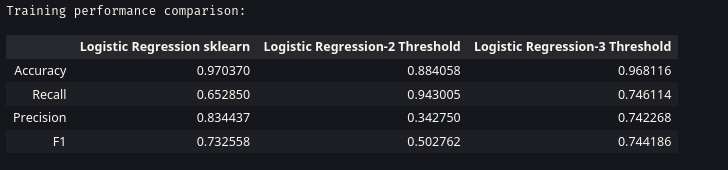
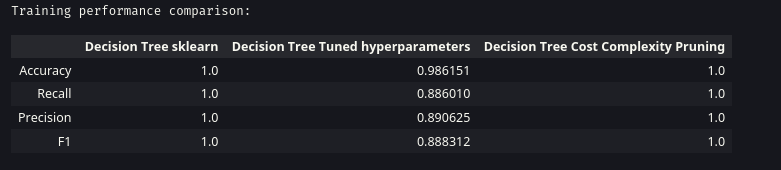

Test

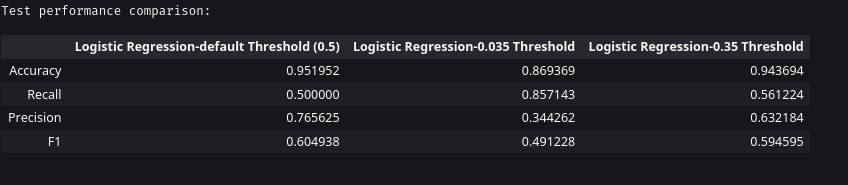
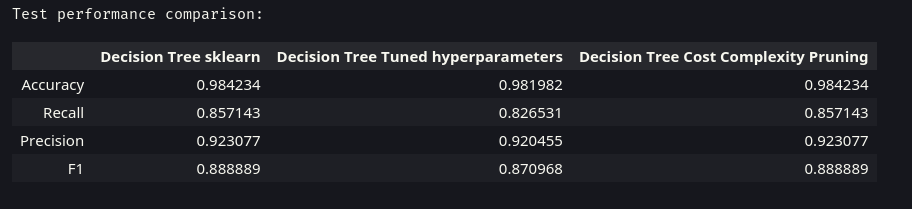

## Actionable Insights and Business Recommendations


What recommendations would you suggest to the bank?

The feature importances show that the following features are the most important for predicting whether a customer will take out a loan:

- Income: Customers with higher incomes are more likely to take out loans. This is because they have more disposable income and can afford to make loan payments.
- Education: Customers with higher levels of education are also more likely to take out loans. This is because they are more likely to be in high-paying jobs and have the financial knowledge to manage a loan.
- Family: Customers with families are more likely to take out loans. This is because they may need money to pay for things like child care, education, or a new home.
- CCAvg: CCAvg stands for Credit Card Average. Customers with higher credit card averages are more likely to take out loans. This is because they have a history of borrowing and repaying money, which makes them a lower risk for lenders.
- Age: Customers who are older are more likely to take out loans. This is because they may need money to retire, pay for medical expenses, or start a business.
The other features are less important for predicting whether a customer will take out a loan. However, they can still be used to improve the accuracy of the model.

Here are some additional insights that can be gained from the feature importances:

- Income and education are the most important factors for predicting whether a customer will take out a loan. This is because these factors are closely related to a customer's ability to repay a loan.
- Family size is also a significant factor. This is because larger families tend to have higher expenses, which can make it more difficult to save money for a down payment on a home or other major purchase.
- Credit card average is a good indicator of a customer's creditworthiness. This is because it shows how well a customer has managed their credit in the past.
- Age is a less important factor, but it can still be used to improve the accuracy of the model. This is because older customers are more likely to have accumulated assets, such as a home or retirement savings, which can make them a lower risk for lenders.


#### Decision tree vs logistic regression


The comparison between logistic regression and decision tree shows that they have different strengths and weaknesses.

Logistic regression is a linear model that can be used to predict the probability of an event occurring. In this case, the event is a customer taking out a loan. Logistic regression is relatively easy to interpret and can be used to make predictions on new data. However, it can be sensitive to overfitting and may not be as accurate as decision trees.

Decision trees are a non-linear model that can be used to predict the probability of an event occurring. In this case, the event is a customer taking out a loan. Decision trees are relatively easy to train and can be more accurate than logistic regression. However, they can be difficult to interpret and may not be as generalizable to new data.

Ultimately, the best model for AllLife Bank will depend on their specific needs. If they are looking for a model that is easy to interpret and can be used to make predictions on new data, then logistic regression may be the best option. However, if they are looking for a model that is more accurate, then decision trees may be a better choice.

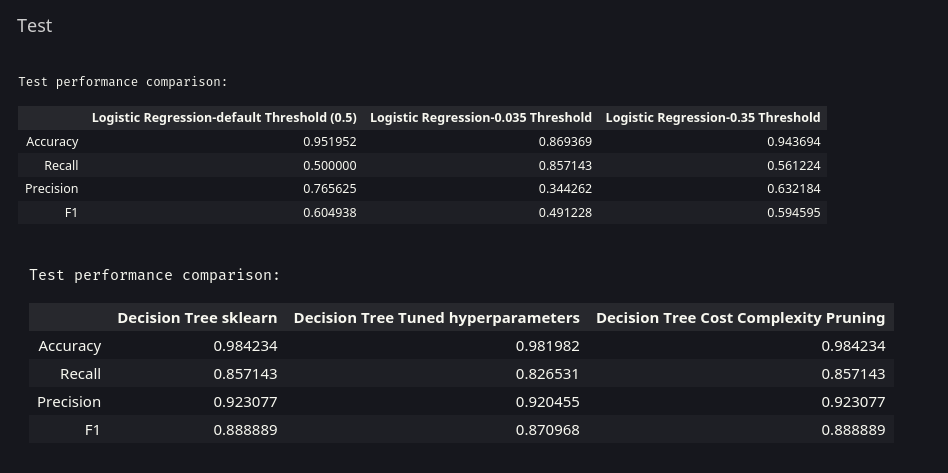

As you can see, decision trees have a higher accuracy, recall, and F1 score than logistic regression. However, logistic regression is easier to interpret and can be used to make predictions on new data.


___